In [402]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import tweepy
import csv
import urllib.request
import warnings
from textblob import TextBlob
import re
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

# Web Scraping using Beautiful Soup

In [2]:
#The first thing we'll need to do to scrape a web page is to download the page. 
#The requests library will make a GET request to a web server, which will download the HTML contents of a given web page.

page = requests.get("https://twittercounter.com/pages/100/india")

In [3]:
page

<Response [200]>

In [4]:
#After running our request, we get a Response object. 
#This object has a status_code property, which indicates if the page was downloaded successfully:
page.status_code

200

In [5]:
page.content

b'<!DOCTYPE html>\n<html xmlns="https://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n\n<head>\n\n    <!-- (REQUIRED) Google Optimize page hiding snippet w. Optimize Container ID -->\n    <style>.async-hide { opacity: 0 !important}</style>\n    <script>\n      (function(a,s,y,n,c,h,i,d,e){s.className+=\' \'+y;\n        h.end=i=function(){s.className=s.className.replace(RegExp(\' ?\'+y),\'\')};\n        (a[n]=a[n]||[]).hide=h;setTimeout(function(){i();h.end=null},c);\n      })(window,document.documentElement,\'async-hide\',\'dataLayer\', 2000,{\'GTM-T46THLT\':true});\n    </script>\n\n    <script type="text/javascript">\n      var is_logged_in = \'false\';\n      (function(i,s,o,g,r,a,m){i[\'GoogleAnalyticsObject\']=r;i[r]=i[r]||function(){\n          (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),\n        m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)\n      })(window,document,\'script\',\'//www.google-analytics.com/an

In [7]:
soup = BeautifulSoup(page.content, 'html.parser')

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="https://www.w3.org/1999/xhtml">
 <head>
  <!-- (REQUIRED) Google Optimize page hiding snippet w. Optimize Container ID -->
  <style>
   .async-hide { opacity: 0 !important}
  </style>
  <script>
   (function(a,s,y,n,c,h,i,d,e){s.className+=' '+y;
        h.end=i=function(){s.className=s.className.replace(RegExp(' ?'+y),'')};
        (a[n]=a[n]||[]).hide=h;setTimeout(function(){i();h.end=null},c);
      })(window,document.documentElement,'async-hide','dataLayer', 2000,{'GTM-T46THLT':true});
  </script>
  <script type="text/javascript">
   var is_logged_in = 'false';
      (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
          (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
        m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
      })(window,document,'script','//www.google-analytics.com/analytics.js','ga');
      ga('create', 'UA-729494-3'

In [9]:
#As all the tags are nested, we can move through the structure one level at a time. 
#We can first select all the elements at the top level of the page using the children property of soup. 
#Note that children returns a list generator, so we need to call the list function on it:
list(soup.children)

['html',
 '\n',
 <html lang="en" xml:lang="en" xmlns="https://www.w3.org/1999/xhtml">
 <head>
 <!-- (REQUIRED) Google Optimize page hiding snippet w. Optimize Container ID -->
 <style>.async-hide { opacity: 0 !important}</style>
 <script>
       (function(a,s,y,n,c,h,i,d,e){s.className+=' '+y;
         h.end=i=function(){s.className=s.className.replace(RegExp(' ?'+y),'')};
         (a[n]=a[n]||[]).hide=h;setTimeout(function(){i();h.end=null},c);
       })(window,document.documentElement,'async-hide','dataLayer', 2000,{'GTM-T46THLT':true});
     </script>
 <script type="text/javascript">
       var is_logged_in = 'false';
       (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
           (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
         m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
       })(window,document,'script','//www.google-analytics.com/analytics.js','ga');
       ga('create', 'UA-

In [10]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [11]:
#As you can see, all of the items are BeautifulSoup objects. 
#The first is a Doctype object, which contains information about the type of the document. 
#The second is a NavigableString, which represents text found in the HTML document. 
#The final item is a Tag object, which contains other nested tags. 

#The Tag object allows us to navigate through an HTML document, and extract other tags and text. 

html = list(soup.children)[2]

In [12]:
#Each item in the list returned by the children property is also a BeautifulSoup object, 
#so we can also call the children method on html.
list(html.children)

['\n', <head>
 <!-- (REQUIRED) Google Optimize page hiding snippet w. Optimize Container ID -->
 <style>.async-hide { opacity: 0 !important}</style>
 <script>
       (function(a,s,y,n,c,h,i,d,e){s.className+=' '+y;
         h.end=i=function(){s.className=s.className.replace(RegExp(' ?'+y),'')};
         (a[n]=a[n]||[]).hide=h;setTimeout(function(){i();h.end=null},c);
       })(window,document.documentElement,'async-hide','dataLayer', 2000,{'GTM-T46THLT':true});
     </script>
 <script type="text/javascript">
       var is_logged_in = 'false';
       (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
           (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
         m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
       })(window,document,'script','//www.google-analytics.com/analytics.js','ga');
       ga('create', 'UA-729494-3', 'auto');
       ga('require', 'GTM-T46THLT');
       ga('send', 'page

In [15]:
#There are two tags here, head, and body. We want to explore body
body = list(html.children)[3]
body

<body style="background: #35454E;">
<!-- < ?php require(WEB_ROOT . 'views/components/notice.php'); ?> -->
<script>
        var adblockDetected = false;

        (function(){
            var test = document.createElement('div');

            test.innerHTML = '&nbsp;';
            test.className = 'adsbox';

            document.body.appendChild(test);

            window.setTimeout(function() {
              if (test.offsetHeight === 0) {
                adblockDetected = true;
              }

              test.remove();
            }, 100);
        })();
    </script>
<script>
		dataLayer = [{

			'pageURL': window.location.pathname,
			'pageTitle': document.title,

		
			'pageType': 'top100-followers',
			'pageSubType': '',

		
		
		}];

		function ga (i,s,o,g,r,a,m) {
			dataLayer.push({'eCat': o, 'eAct': g, 'eLab': r, 'eVal': '0', 'event': 'Legacy'});
		};

	</script>
<!-- Google Tag Manager -->
<noscript><iframe height="0" src="//www.googletagmanager.com/ns.html?id=GTM-NTJFT2" st

In [16]:
list(body.children)

['\n',
 " < ?php require(WEB_ROOT . 'views/components/notice.php'); ?> ",
 '\n',
 <script>
         var adblockDetected = false;
 
         (function(){
             var test = document.createElement('div');
 
             test.innerHTML = '&nbsp;';
             test.className = 'adsbox';
 
             document.body.appendChild(test);
 
             window.setTimeout(function() {
               if (test.offsetHeight === 0) {
                 adblockDetected = true;
               }
 
               test.remove();
             }, 100);
         })();
     </script>,
 '\n',
 <script>
 		dataLayer = [{
 
 			'pageURL': window.location.pathname,
 			'pageTitle': document.title,
 
 		
 			'pageType': 'top100-followers',
 			'pageSubType': '',
 
 		
 		
 		}];
 
 		function ga (i,s,o,g,r,a,m) {
 			dataLayer.push({'eCat': o, 'eAct': g, 'eLab': r, 'eVal': '0', 'event': 'Legacy'});
 		};
 
 	</script>,
 '\n',
 ' Google Tag Manager ',
 '\n',
 <noscript><iframe height="0" src="//www.googletagma

In [25]:
#Finding all instances of a tag at once
soup.find_all('a')

[<a href="#" id="mob_menu" title="menu"> </a>,
 <a class="tc_logo left" href="/" onclick="dataLayer.push({'eCat':'Engagement : Logged ' + twcApp.getLoggedStatus(), 'eAct': 'G &gt; Header', 'eLab': 'Logo', 'eVal': '1', 'event': 'KPI'});" rel="nofollow" title="Twitter followers stats by Twitter Counter"></a>,
 <a href="/pages/features" onclick="dataLayer.push({'eCat':'Engagement : Logged '+twcApp.getLoggedStatus(), 'eAct': 'G &gt; Header', 'eLab': 'Features', 'eVal': '1', 'event': 'KPI'}); analytics.track('Clicked Header Link', { page: 'Features' });" title="Check out Twitter Counter's features">Analytics
 						<span style="display: block; line-height: 1; font-size: 12px; text-transform: lowercase; text-align: center;">insights made easy</span>
 </a>,
 <a href="/pages/featured" onclick="dataLayer.push({'eCat':'Engagement : Logged '+twcApp.getLoggedStatus(), 'eAct': 'G &gt; Header', 'eLab': 'Get Followers', 'eVal': '1', 'event': 'KPI'}); analytics.track('Clicked Header Link', { page: 'Ge

In [28]:
soup.find_all('a', class_='uname')

[<a class="uname" href="/narendramodi" onclick="dataLayer.push({'eCat':'Engagement : Logged '+twcApp.getLoggedStatus(), 'eAct': 'P &gt; Top 100', 'eLab': 'View profile', 'eVal': '2', 'event': 'KPI'}); analytics.track('Viewed Profile', { source: 'Top 100', element: 'Username' });"><span itemprop="alternateName">@narendramodi</span></a>,
 <a class="uname" href="/SrBachchan" onclick="dataLayer.push({'eCat':'Engagement : Logged '+twcApp.getLoggedStatus(), 'eAct': 'P &gt; Top 100', 'eLab': 'View profile', 'eVal': '2', 'event': 'KPI'}); analytics.track('Viewed Profile', { source: 'Top 100', element: 'Username' });"><span itemprop="alternateName">@SrBachchan</span></a>,
 <a class="uname" href="/iamsrk" onclick="dataLayer.push({'eCat':'Engagement : Logged '+twcApp.getLoggedStatus(), 'eAct': 'P &gt; Top 100', 'eLab': 'View profile', 'eVal': '2', 'event': 'KPI'}); analytics.track('Viewed Profile', { source: 'Top 100', element: 'Username' });"><span itemprop="alternateName">@iamsrk</span></a>,
 <

In [30]:
soup.find_all('a', class_='uname')[0].get_text()

'@narendramodi'

In [404]:
popularTweeters = list(soup.find_all('a', class_='uname'))
tweeterNames = [i.get_text() for i in popularTweeters]
tweeterNames[:10]

['@narendramodi',
 '@SrBachchan',
 '@iamsrk',
 '@BeingSalmanKhan',
 '@PMOIndia',
 '@akshaykumar',
 '@sachin_rt',
 '@aamir_khan',
 '@deepikapadukone',
 '@imVkohli']

In [73]:
#Twitter API credentials
consumer_key = "LvltFzjUcqdVtrmeWj4sgRHOW"
consumer_secret = "T8upM51nk3AJcK2qLbgervy9LfRmWu5PZ2xguSDi89t5wNnqVP"
access_key = "57291689-yUN8dYEB3hWAenxhcMYWiDImp3m97zKNcXVC8uiqi"
access_secret = "LmqpZlC7Lo8TkAqAQNYzQGp82Rz2YYdYoVvd0D0q2KJNq"

In [134]:
def get_profile_picture(screenName):

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    userobj = api.get_user(screen_name = screenName)
    urllib.request.urlretrieve(userobj.profile_image_url_https, '%s_profile_pic.jpeg' % screenName) # save image to disk

In [359]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    #initialize a list to hold all the tweepy Tweets
    alltweets = []	

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=100)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #transform the tweepy tweets into a 2D array that will populate the csv	
    outtweets = [[tweet.text.encode("utf-8"), tweet.source] for tweet in alltweets]
    
    #write the csv	
    with open('%s_tweets.csv' % screen_name, 'w', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(["text", "source"])
        writer.writerows(outtweets)
        

In [360]:
def getTweets(tweeple):
    for i in tweeple:
        get_all_tweets(i)

In [361]:
getTweets(tweeterNames)

In [132]:
def getProfilePictures(tweeple):
     for i in tweeple:
        get_profile_picture(i)

In [135]:
getProfilePictures(tweeterNames)

In [162]:
def concat_tweets(screen_name):
    twitterName = screen_name + '_tweets.csv'
    myfile = pd.read_csv(twitterName)
    
    concatString = ""

    for i in myfile['text']:
        concatString +=i
        
    return concatString
    

In [163]:
def concatTweets(tweeple):
    
    combinedTweets = []
    
    for i in tweeple:
        combinedTweets.append(concat_tweets(i))
        
    return combinedTweets
        
    

In [165]:
user_language_array = concatTweets(tweeterNames)

In [166]:
len(user_language_array)

100

In [167]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, stop_words = 'english',\
                             strip_accents = 'unicode', lowercase=True, ngram_range=(1,2),\
                            norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

X = vectorizer.fit_transform(user_language_array)
D = -(X * X.T).todense() # Distance matrix: dot product between tfidf vectors

# Sentiment Analysis of tweets using TextBlob 


In [221]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [222]:
def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [223]:
twitterName = '@narendramodi' + '_tweets.csv'
myfile = pd.read_csv(twitterName)

In [237]:
myfile['SA'] = np.array([ analyze_sentiment(tweet) for tweet in myfile['text'] ])

In [238]:
myfile[0:4]

text  SA
0  b"Congratulations @vishy64theking! You've prov...   0
1  b'Warm birthday greetings to my valued colleag...   1
2  b'In Shimla, relished coffee at the Indian Cof...   1
3  b'I thank the people of Shimla for the warm we...   1

In [243]:
pos_tweets = myfile[myfile['SA'] > 0].count()
neu_tweets = myfile[myfile['SA'] == 0].count()
neg_tweets = myfile[myfile['SA'] < 0].count()

In [250]:
print("Percentage of positive tweets: {}%".format(pos_tweets.text*100/len(myfile['text'])))
print("Percentage of neutral tweets: {}%".format(neu_tweets.text*100/len(myfile['text'])))
print("Percentage of negative tweets: {}%".format(neg_tweets.text*100/len(myfile['text'])))

Percentage of positive tweets: 42.0%
Percentage of neutral tweets: 52.0%
Percentage of negative tweets: 6.0%


In [247]:
pos_tweets.text

42

In [251]:
def processTweets(screen_name):
    twitterName = screen_name + '_tweets.csv'
    myfile = pd.read_csv(twitterName)
    
    #Create new column for sentiment analysis:
    myfile['SA'] = np.array([ analyze_sentiment(tweet) for tweet in myfile['text'] ])
    
    return myfile
    

In [263]:
twitterDf = pd.DataFrame()


In [265]:
twitterDf['Top 100 Users'] = tweeterNames

In [403]:
def fillDataframe(users):
    posTweets = []
    neuTweets = []
    negTweets = []

    for i in users:
        twitterName = i + '_tweets.csv'
        myfile = pd.read_csv(twitterName)

        myfile['SA'] = np.array([analyze_sentiment(tweet) for tweet in myfile['text']])

        pos_tweets = myfile[myfile['SA'] > 0].count()
        neu_tweets = myfile[myfile['SA'] == 0].count()
        neg_tweets = myfile[myfile['SA'] < 0].count()

        posTweets.append(pos_tweets.text)
        neuTweets.append(neu_tweets.text)
        negTweets.append(neg_tweets.text)

    twitterDf['Positive Tweets'] = posTweets
    twitterDf['Neutral Tweets'] = neuTweets
    twitterDf['Negative Tweets'] = negTweets
    
    return myfile

In [317]:
fillDataframe(tweeterNames)

text  SA
0   b'@siakhanofficial You\xe2\x80\x99ve chosen on...   0
1   b'It\xe2\x80\x99s humbling to perform in small...   1
2   b'@ArtofLiving @voicesofiwc @mangeshkarlata \x...   0
3   b'Just arrived in Mumbai by an early morning f...   1
4   b'Thank you Hyderabad for being such a great a...   1
5   b'Caught him at Mumbai airport \xf0\x9f\x98\x8...   0
6   b'Very pleased that Asha\xe2\x80\x99s Birmingh...   1
7   b'From the recently concluded Dubai Concert ht...   0
8   b'Enjoying the company of my age group \xf0\x9...   1
9   b'Thank you Dubai \xf0\x9f\x99\x8f\xf0\x9f\x8f...   0
10  b'Dubai audience, you are absolutely amazing. ...   1
11  b'Looking forward to my concert on 3 Nov at th...   0
12  b'My brother Hridaynath turns 80 today. Wishin...   1
13  b'Going to the City Of Joy tomorrow. I love Ko...   1
14  b'Going to the City Of Joy tomorrow. I love Ko...   1
15  b'Diwali Greetings \xf0\x9f\x99\x8f\xf0\x9f\x8...   0
16  b'I love you Ahmedabad. Audience  switched on ...   1
17  b'Namaste Ahmedabad. Are you ready for my conc...   1
18  b'My Madame Tussaud\xe2\x80\x99s wax figure fr...   0
19  b'Unveiling my wax figure at Madame Tussaud\xe...   0
20                         b'https://t.co/bYR69HRqPc'   0
21                     b'Arrived in New Delhi today.'   1
22  b'Best wishes for Dassera \xf0\x9f\x99\x8f\xf0...   1
23  b'Hey Rangalo Ahmedabad, Looking forward to pe...   0
24  b'"What\'s so happy in a birthday. I\'m a year...   1
25  b'Thank you to all of you for your kind birthd...   1
26  b'Grandchildren wanted to celebrate my 84th in...   0
27  b'Rainy day in Geneva today https://t.co/5V1qW...   0
28  b'The woods are lovely dark &amp; deep, but I ...   1
29  b'Mumbaikars stay indoors today with bhajiyas ...   0
..                                                ...  ..
70  b'I shall be inaugurating "iAzure" Apple Autho...   0
71  b'RJ Anmol &amp; I chatting about the Golden E...   1
72  b'@king_ajaz786 @SrBachchan This is during the...   1
73  b'Blast from the past: Rahul &amp; I recording...  -1
74  b'Very pleased to announce that Asha\'s Manche...   1
75  b'@_bhads4life @dreamgirlhema That was a diffi...  -1
76  b'@TruthAlias \xf0\x9f\x99\x8f\xf0\x9f\x8f\xbc...   0
77  b'Having a fun cooking session in Dubai https:...   1
78  b'Very pleased to announce that Asha\'s Birmin...   1
79  b"@KcPingle @SrBachchan Perhaps, Amitji's firs...   1
80  b'With the wonderful Ramesh Sippy at a dinner ...   1
81  b"RT @tussaudsdelhi: Everyone's humming the ne...   0
82  b'Blue is the winning colour. Well done once a...   1
83  b"Pleased to announce that Asha's Dubai has be...   1
84  b'Enjoyed The film on Sachin. https://t.co/qOY...   1
85  b'RT @ashabhosle: Coming soon this Ramadan in ...   0
86  b'Coming soon this Ramadan in my Chefs Avatar ...   0
87  b'Very sad to hear about Vinod Khannaji. A dec...  -1
88  b'Taking back fond memories of Benares https:/...   0
89  b'Pranam to Varanasi &amp; to Benarasis for an...   1
90  b'@Sweta67845171 \xf0\x9f\x99\x8f\xf0\x9f\x8f\...   0
91  b'@hemantvj Sure if you call yourself Ham \xf0...   1
92  b'Room with a view. Overlooking the Ganges htt...   0
93  b'Arrived in Benares: older than history, olde...   1
94      b'Evening progresses https://t.co/ns0XXye2Mr'   0
95            b'This evening https://t.co/18lsB8pW3c'   0
96             b'Now in Juhu https://t.co/D97WfJDXbu'   0
97  b'@MaheshNBhatt \xf0\x9f\x99\x8f\xf0\x9f\x8f\x...   0
98  b"@rupshadg How wonderful. I must have fed you...   1
99  b'\xf0\x9f\x98\x8a that listeners are enjoying...   1

[100 rows x 2 columns]

In [318]:
twitterDf.head(10)

Top 100 Users  Positive Tweets  Neutral Tweets  Negative Tweets
0     @narendramodi               42              52                6
1       @SrBachchan               50              46                3
2           @iamsrk               55              41                4
3  @BeingSalmanKhan               33              63                4
4         @PMOIndia               26              67                7

In [277]:
#twitterDf.to_csv('twitterSentiment.csv', sep=',')

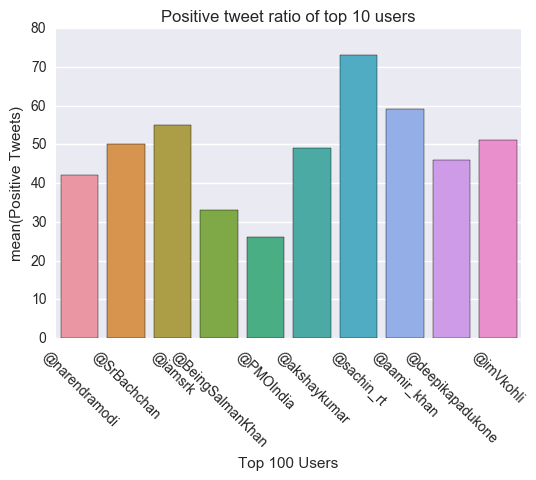

In [406]:
sns.barplot(x="Top 100 Users", y="Positive Tweets", data=twitterDf[:10]);
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title("Positive tweet ratio of top 10 users")

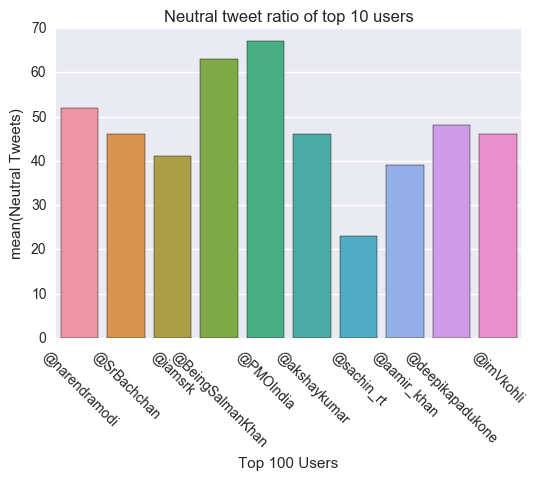

In [303]:
sns.barplot(x="Top 100 Users", y="Neutral Tweets", data=twitterDf[:10]);
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title("Neutral tweet ratio of top 10 users")

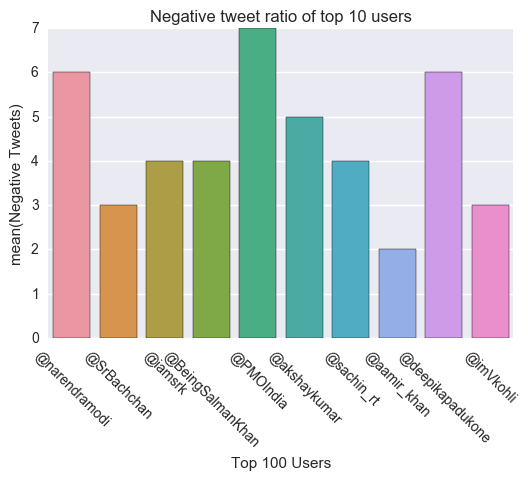

In [304]:
sns.barplot(x="Top 100 Users", y="Negative Tweets", data=twitterDf[:10]);
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title("Negative tweet ratio of top 10 users")

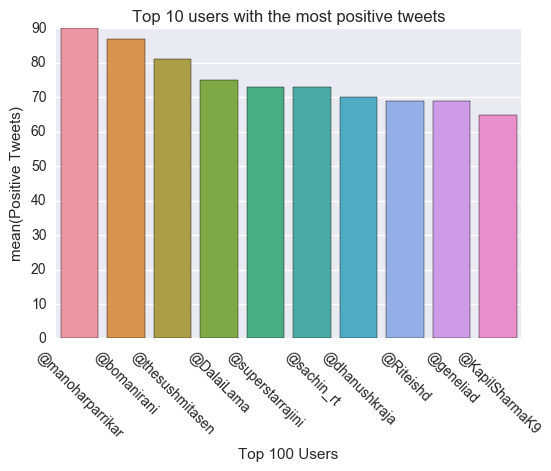

In [305]:
sns.barplot(x="Top 100 Users", y="Positive Tweets", data=twitterDf.sort_values(['Positive Tweets'], ascending = [False])[:10]);
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title("Top 10 users with the most positive tweets")

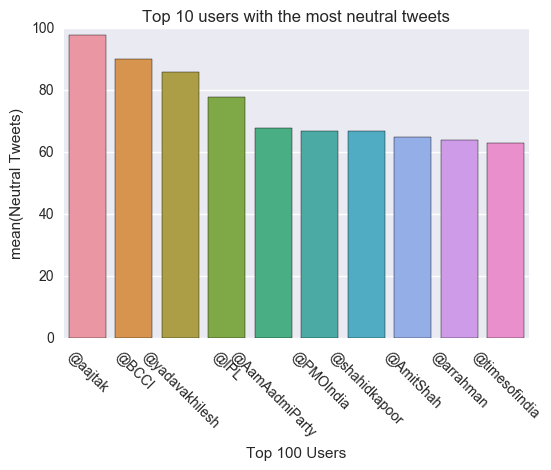

In [306]:
sns.barplot(x="Top 100 Users", y="Neutral Tweets", data=twitterDf.sort_values(['Neutral Tweets'], ascending = [False])[:10]);
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title("Top 10 users with the most neutral tweets")

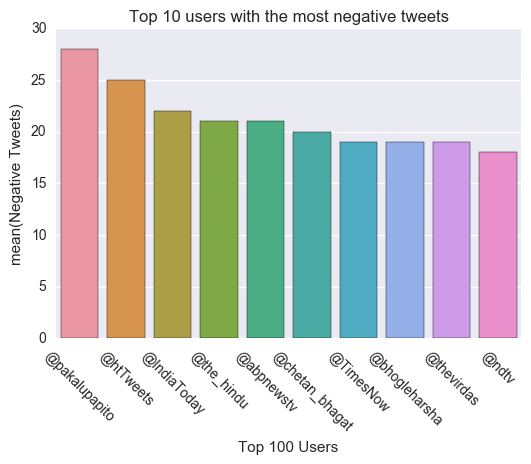

In [310]:
sns.barplot(x="Top 100 Users", y="Negative Tweets", data=twitterDf.sort_values(['Negative Tweets'], ascending = [False])[:10]);
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title("Top 10 users with the most negative tweets")

# Analyzing some of the positive, negative & neutral tweets

In [408]:
twitterName = '@htTweets' + '_tweets.csv'
myfile = pd.read_csv(twitterName)

myfile['SA'] = np.array([analyze_sentiment(tweet) for tweet in myfile['text']])


   

In [411]:
#Negative tweets
myfile[myfile['SA'] == -1]['text']

0     b'Beware, chronic poor sleep may contribute to...
4     b'Why there is a bad smell about life insuranc...
20    b'Delhi: Businessman brutally assaulted by \xe...
21    b'Delhi witnessed 40% rise in deaths due to re...
28    b'Why there is a bad smell about life insuranc...
29    b'Foreign agencies seek CBI help to nab 21 Ind...
45    b'Pakistan man acquitted of blasphemy after 9 ...
49    b'RT @htTweets: #HTPoll| Do you think Pakistan...
53    b'Why there is a bad smell about life insuranc...
56    b'RT @HTSportsNews: Shiv Kapur two behind lead...
66    b'India facing possible mental health epidemic...
68    b'Padmavati: CBFC move fails to mollify Rajput...
72    b'Nirbhaya Fund not being used for women: Moth...
73    b'Crude bomb explosion at two places in Kerala...
74    b'RT @HTSportsNews: I-League: Neroca equalise ...
80    b'Errant CAs may face bigger fines, criminal a...
83    b'Palestine says sorry to India for presence o...
90    b'Not doing what it was expected to do: 8 

In [412]:
#Positive tweets
myfile[myfile['SA'] == 1]['text']

2     b'One of the joyous moments of 2017 was the di...
3     b'The battle against sexual harassment is far ...
6     b'RT @HTSportsNews: .@sachin_rt says current I...
7     b'16-year-old injured during celebratory gunfi...
8     b'Overcrowding a threat to safety in fire-safe...
10    b'Three top firms served notices for not passi...
17    b'Manchester fire: 12 fire engines tackling bl...
19    b'Watch: Video of man confronting Haryana Poli...
31    b'All police stations in Telangana to have soc...
36    b'Google\xe2\x80\x99s high-altitude internet b...
37    b'In 2018, India\xe2\x80\x99s newsmakers vow t...
38    b'The battle against sexual harassment is far ...
39    b'#Column | If you make one promise in the new...
40    b'Govt will take care of right-wingers\xe2\x80...
42    b'RT @HTSportsNews: .@WrestlerSushil faces hea...
46    b'One of the joyous moments of 2017 was the di...
47    b'Videos show Egyptian church gunman confident...
52    b'RT @jeelanikash: Senior @AamAadmiParty l

In [413]:
#Neutral tweets
myfile[myfile['SA'] == 0]['text']

1     b'Manchester fire engulfs 12-storey residentia...
5     b'When life hurts or maims you, seek refuge, a...
9     b'Number of taxis rises 86% in 2 years, buses ...
11    b'RT @HTSportsNews: #INDvSA Indian batsmen hop...
12    b'RT @HTSportsNews: #INDvSA : Series not about...
13    b'Seer\xe2\x80\x99s deadline for Karnataka CM ...
14    b'AAP chooses Sanjay Singh as one of three nom...
15    b'RT @HTSportsNews: Marcelinho\xe2\x80\x99s ha...
16    b'Pakistan lawmaker calls for Doraemon ban to ...
18    b'Gujarat deputy CM Nitin Patel \xe2\x80\x98mi...
22    b'Fire breaks out at 12-storey building in Man...
23    b'RT @HTSportsNews: .@serenawilliams unsure ab...
24    b'Parliament house panel seeks federal body to...
25    b'Viswanathan Anand clinches bronze at World B...
26    b'RT @HTSportsNews: Prajnesh Gunneswaran, Sumi...
27    b'Woof! Dog squad to sniff out smugglers at De...
30    b'Car dealer chases snatchers for 2km on south...
32    b'Army chief reviews security in Jammu and

# Visualizing the sources of tweets

In [364]:
# We obtain all possible sources:
sources = []


for source in data['source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Web Client
* Media Studio
* Twitter for Android


In [385]:
list(set(data['source']))

['Twitter Web Client',
 'Media Studio',
 'Twitter for iPhone',
 'Twitter for Android']

In [386]:
def identifySources(username):
    twitterName = username + '_tweets.csv'
    data = pd.read_csv(twitterName)
    
    #Identify all unique sources of data
    sources = list(set(data['source']))
    # We create a numpy vector mapped to labels:
    percent = np.zeros(len(sources))
    
    for source in data['source']:
        for index in range(len(sources)):
            if source == sources[index]:
                percent[index] += 1
                pass

    percent /= 100

    # Pie chart:
    pie_chart = pd.Series(percent, index=sources, name='Sources')
    pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6), title = username);

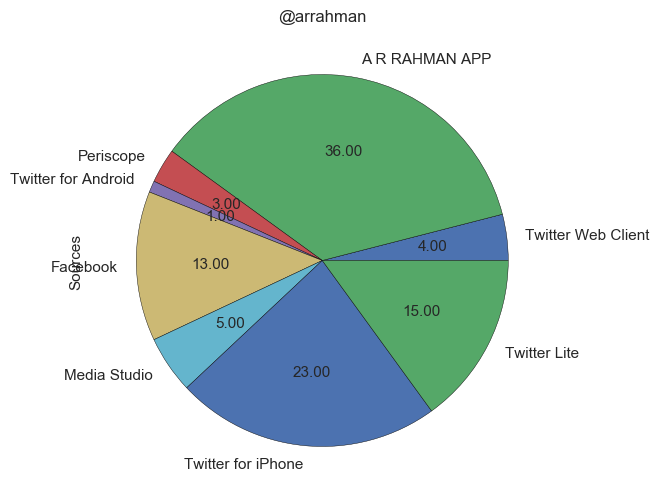

In [401]:
identifySources('@arrahman')

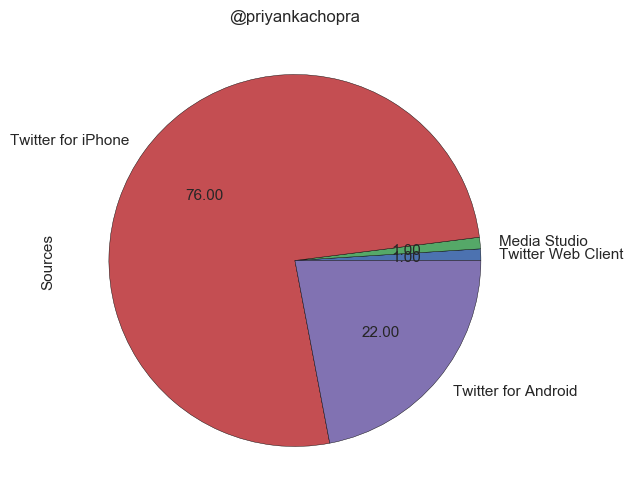

In [400]:
identifySources('@priyankachopra')

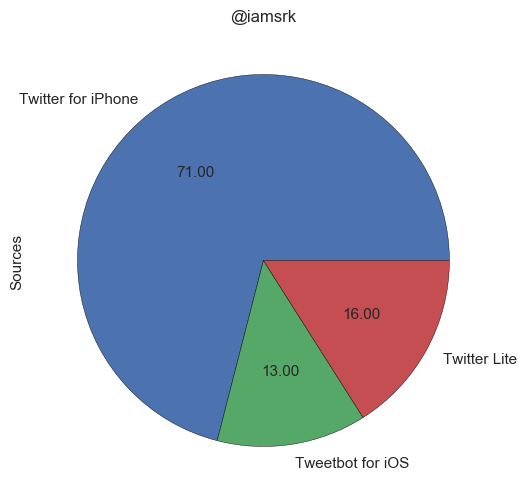

In [415]:
identifySources('@iamsrk')

# Identifying sources of tweets for the top 100 users (Scroll through)

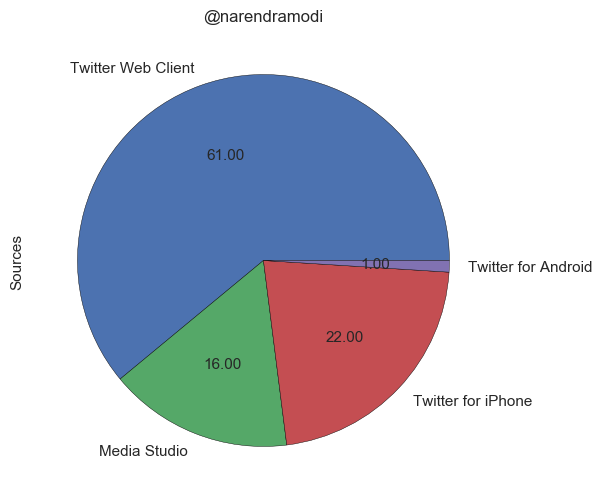

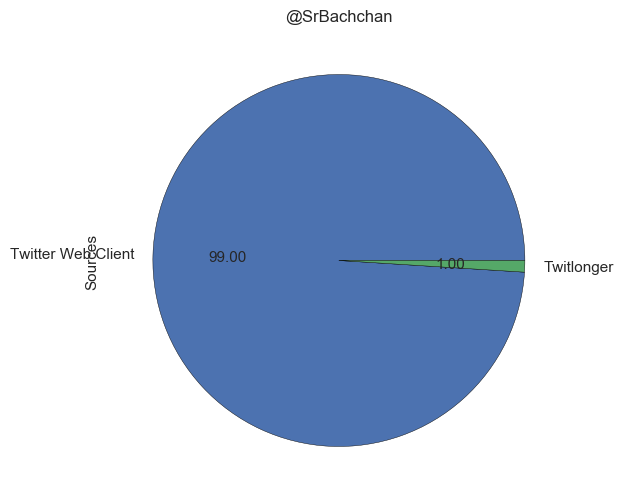

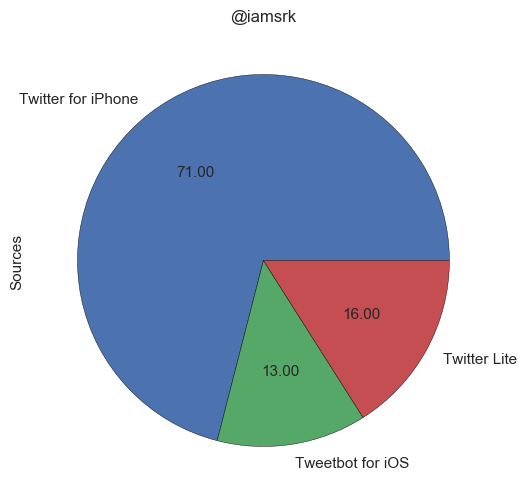

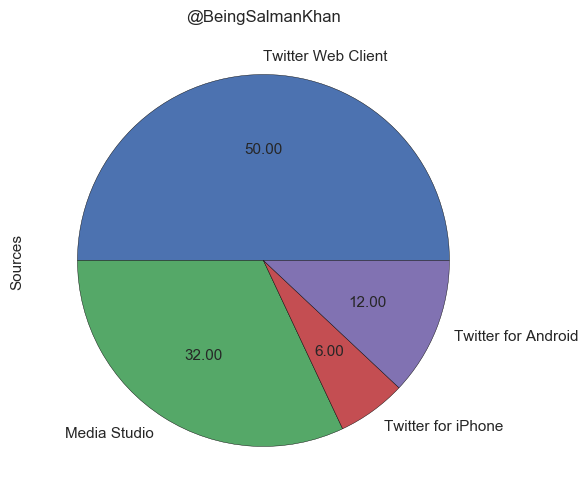

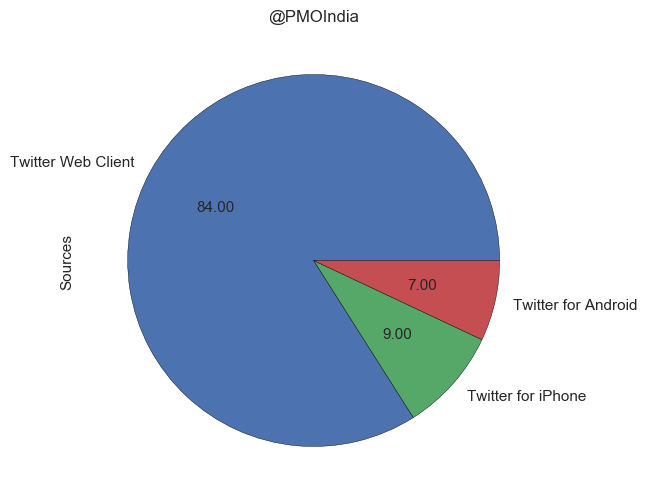

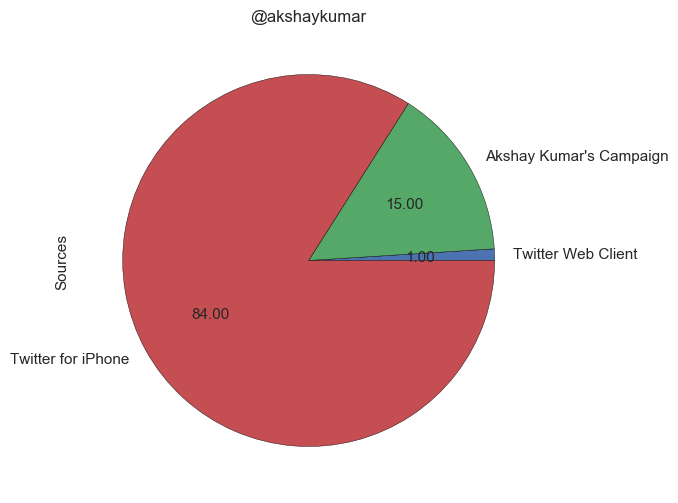

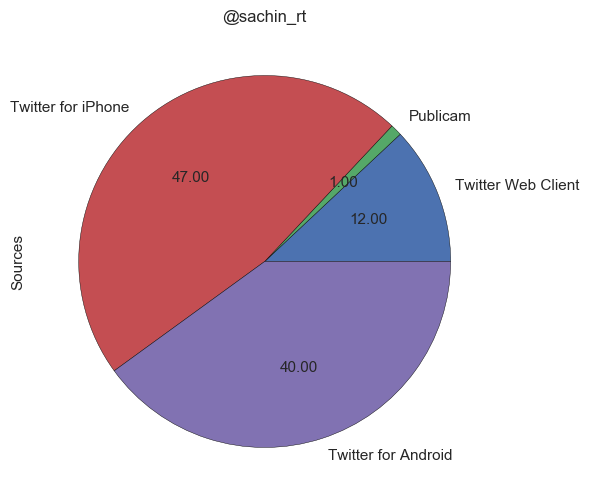

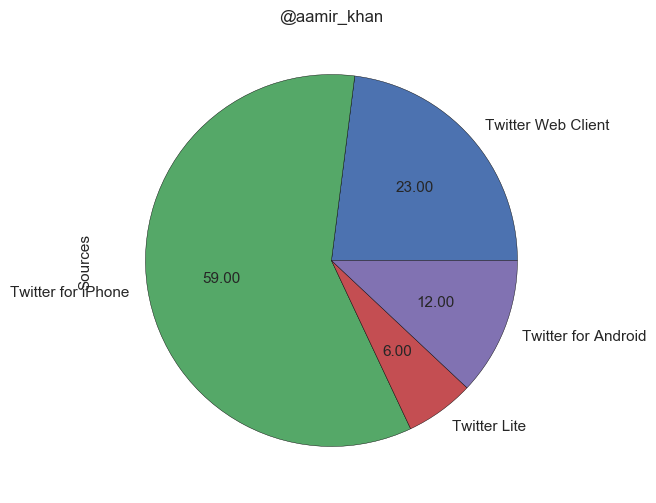

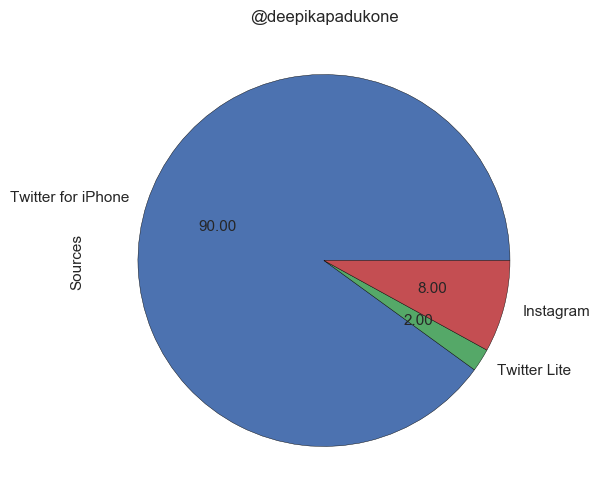

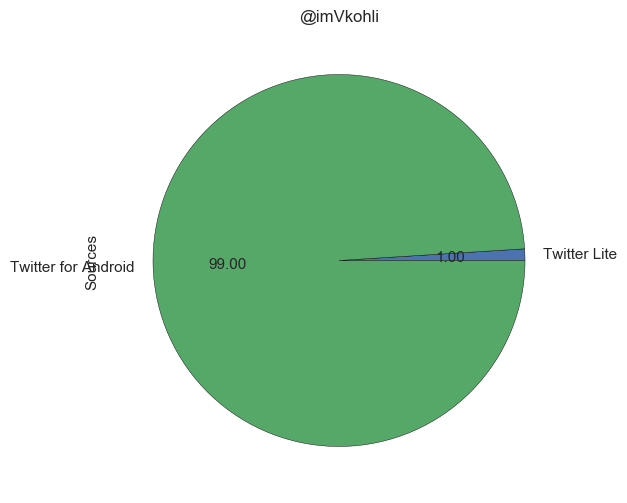

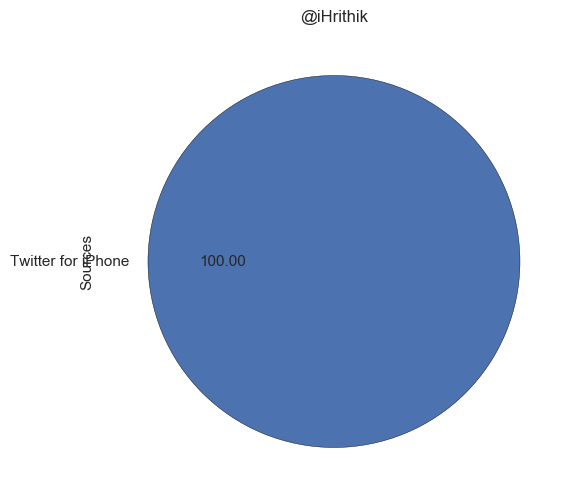

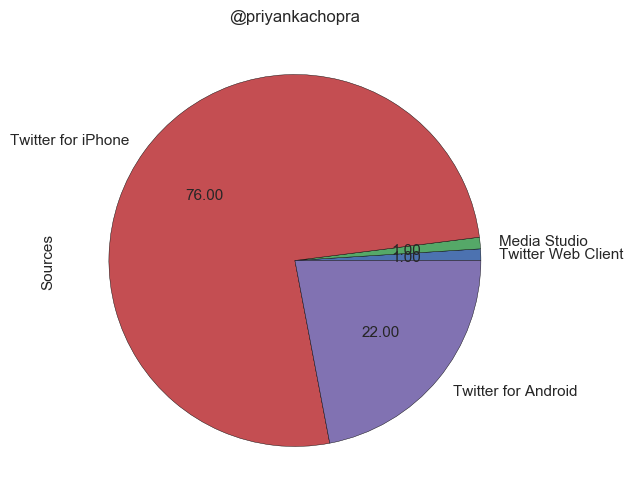

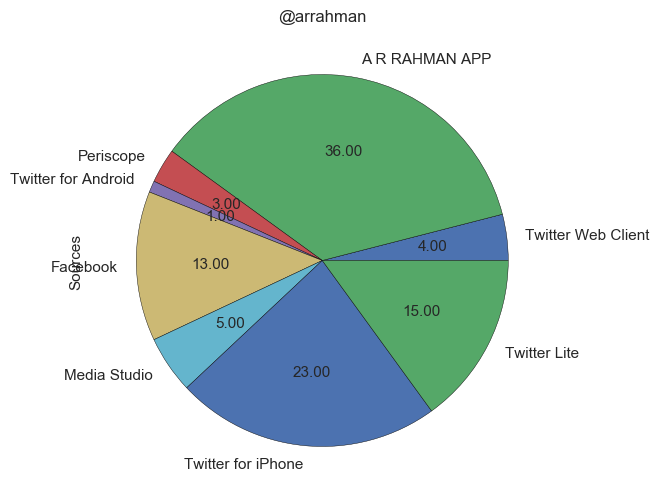

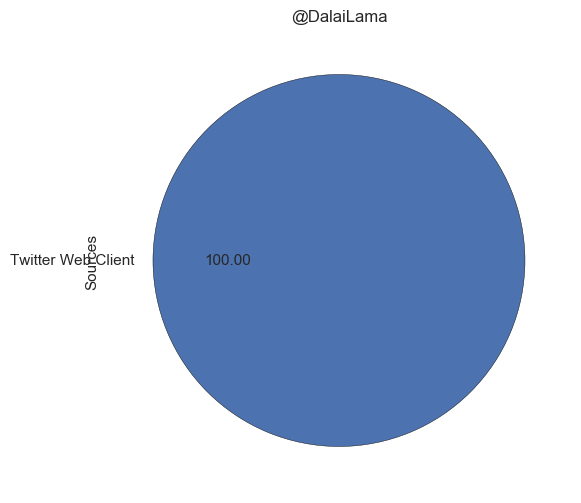

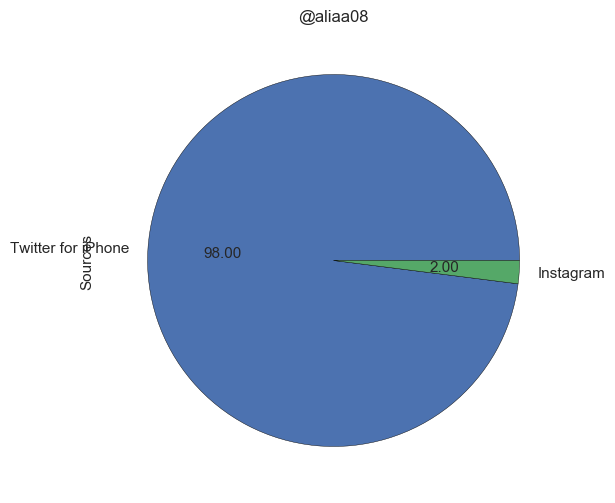

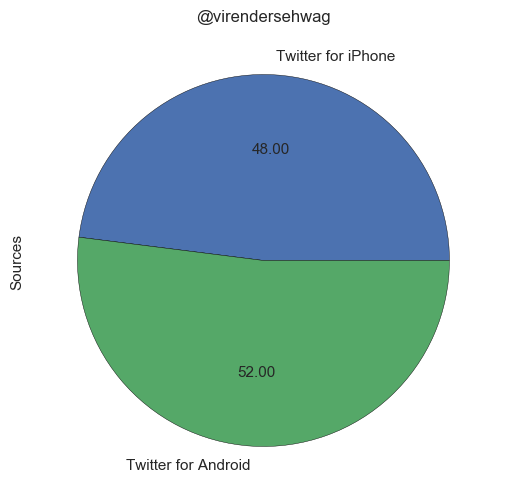

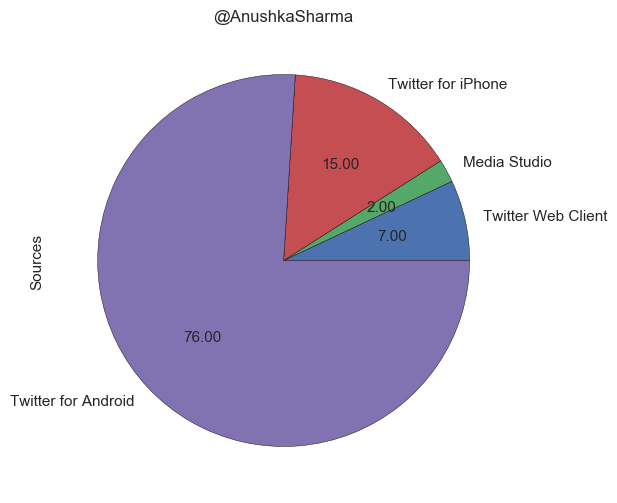

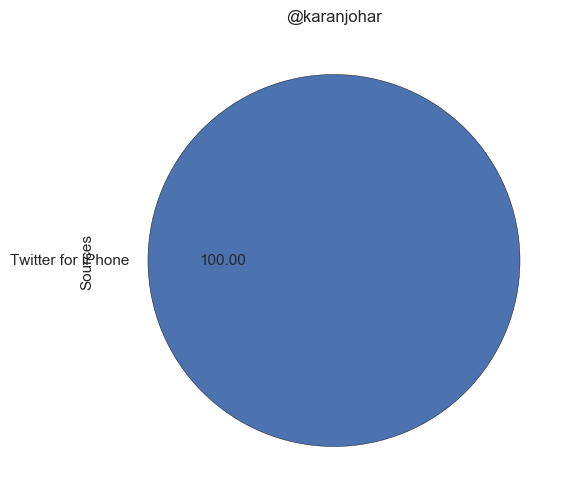

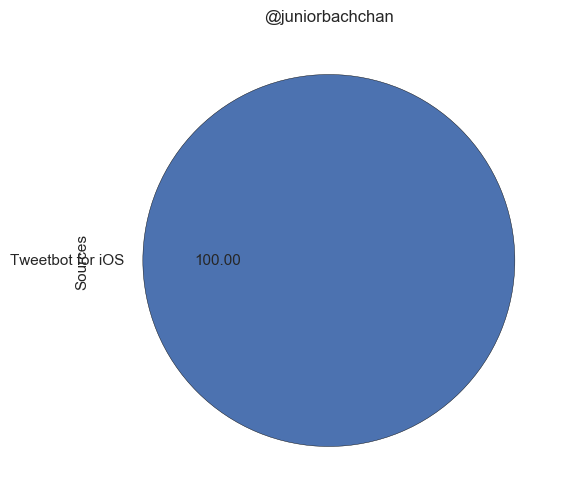

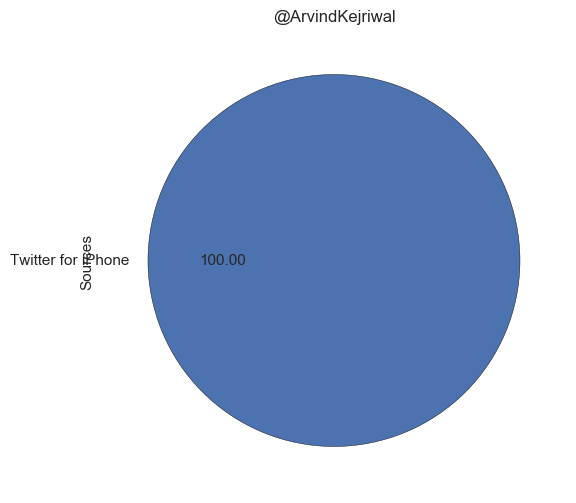

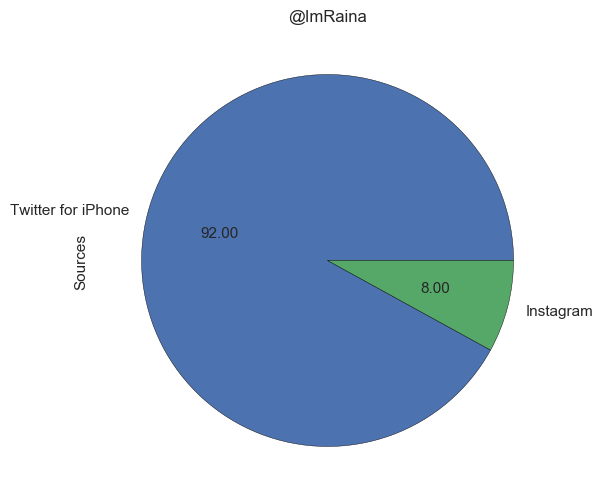

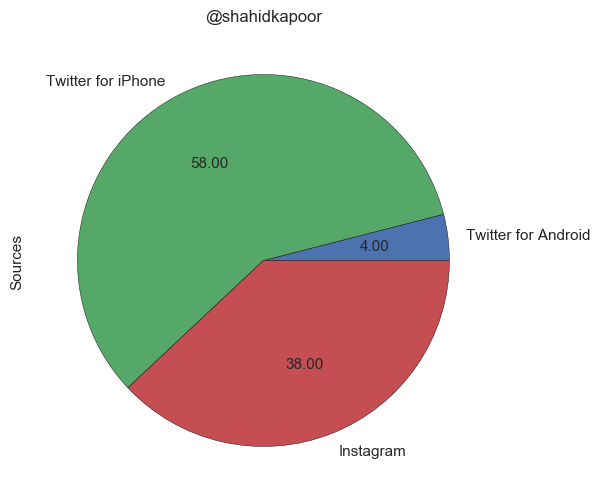

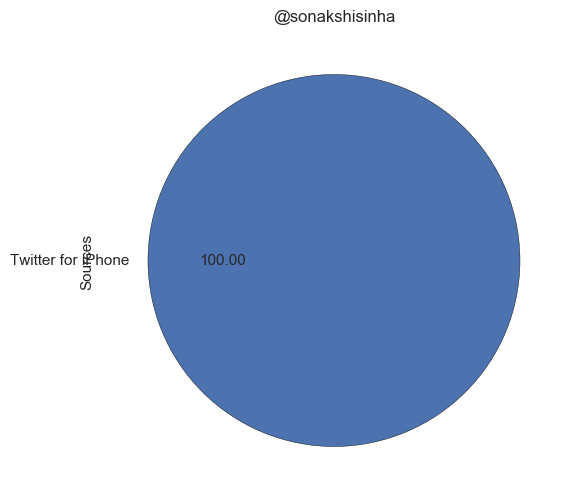

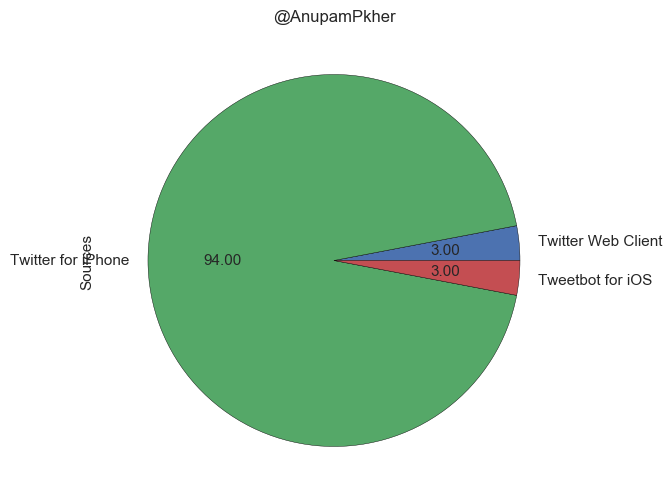

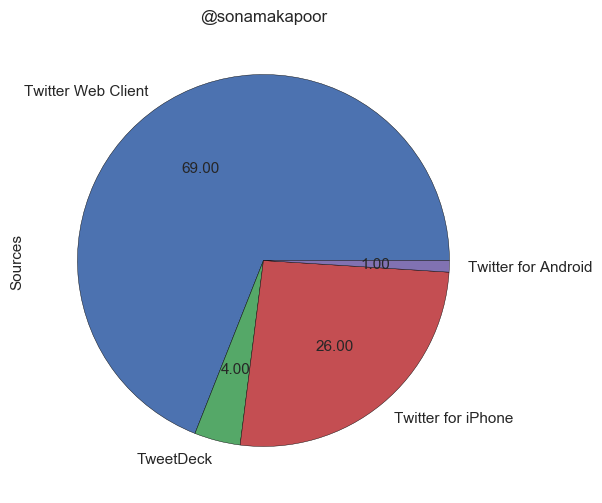

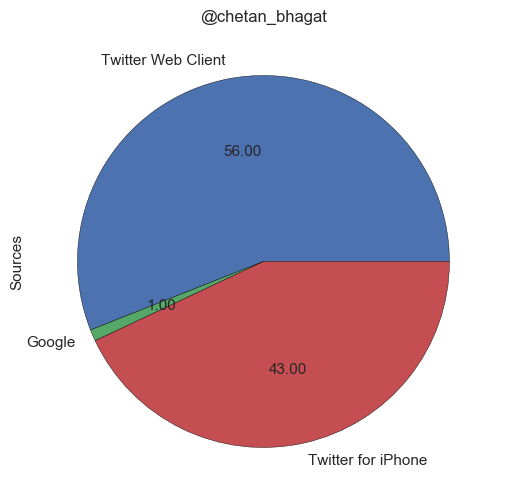

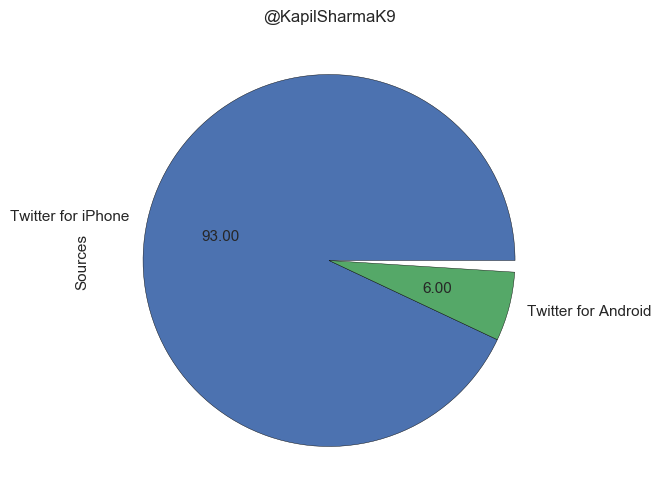

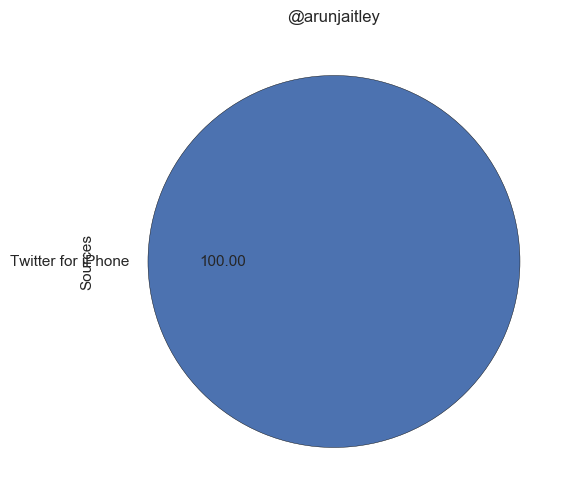

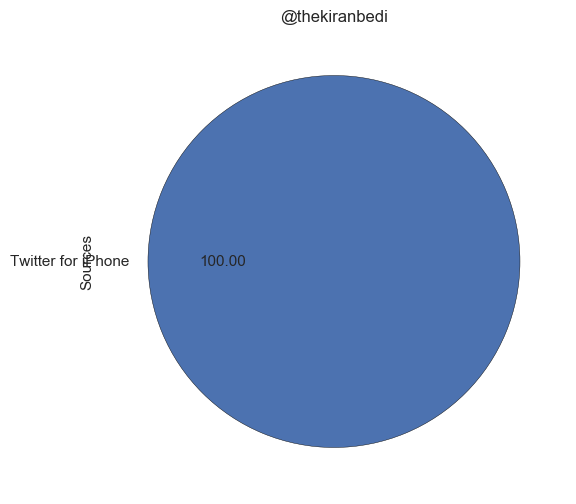

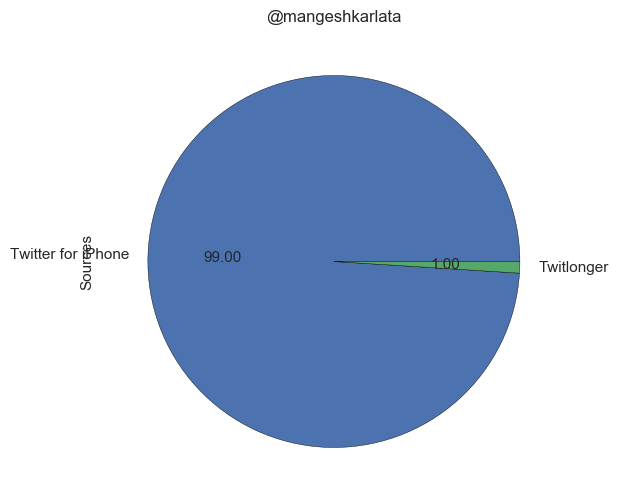

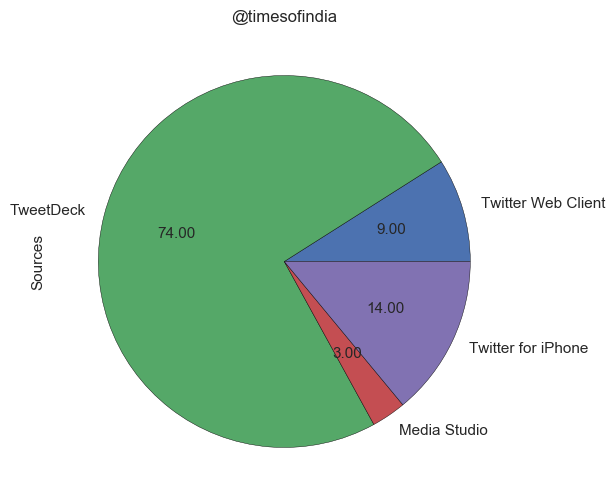

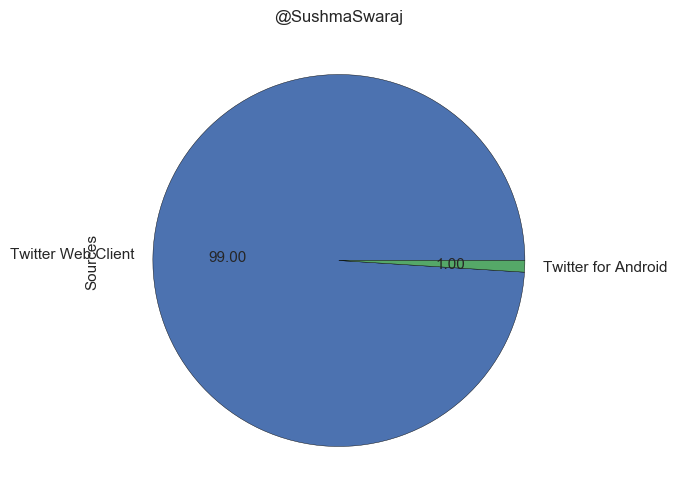

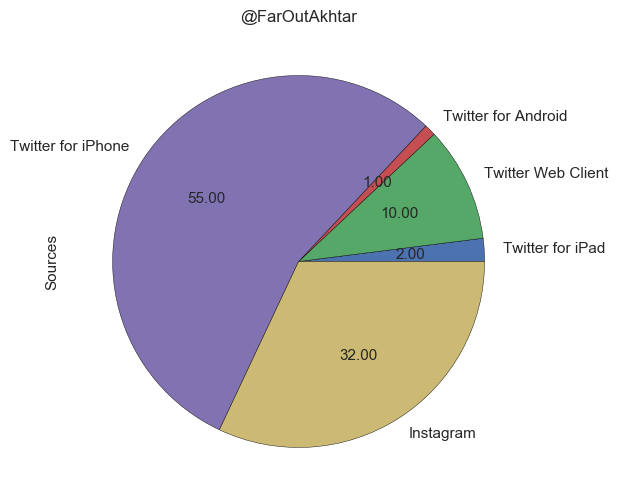

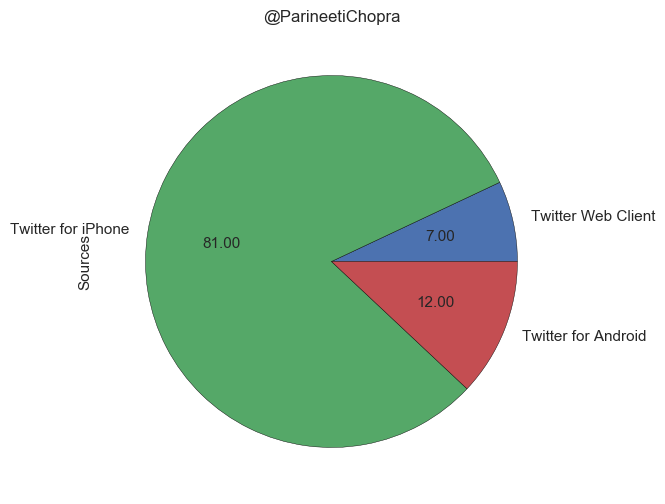

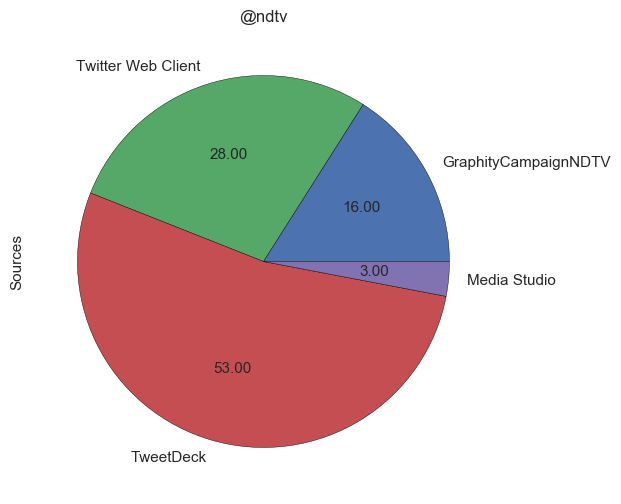

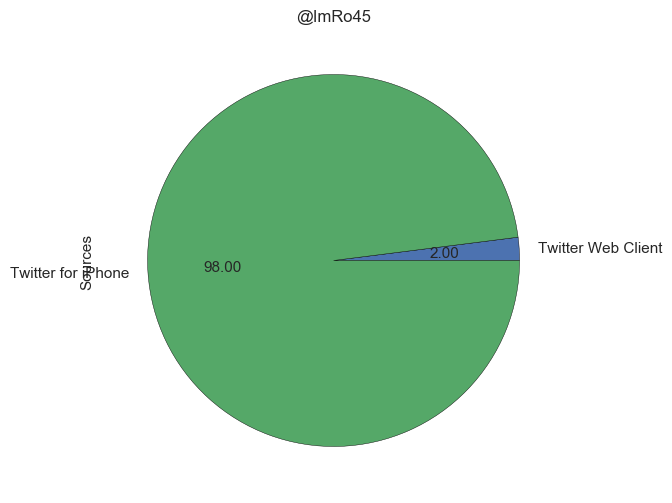

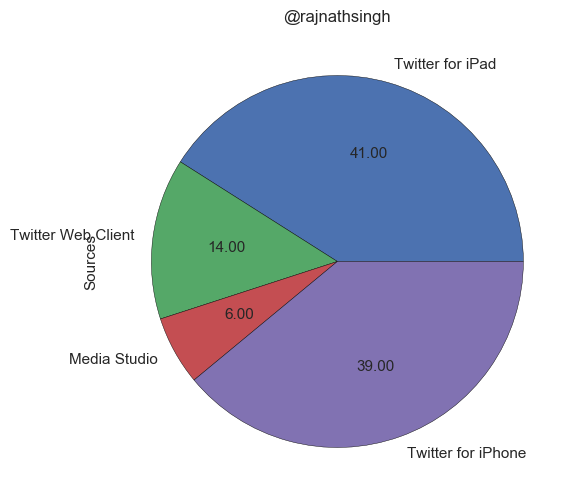

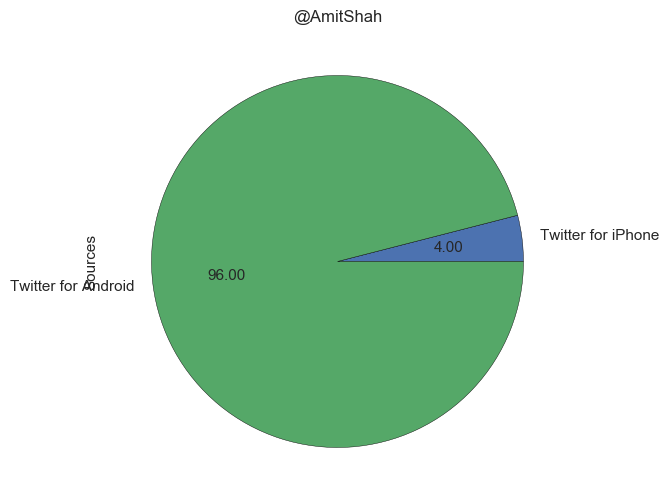

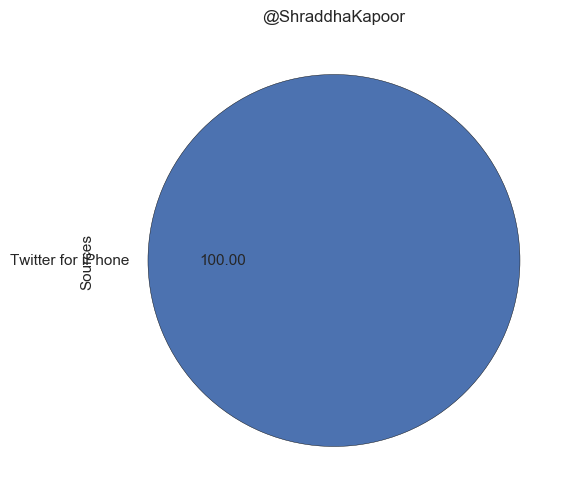

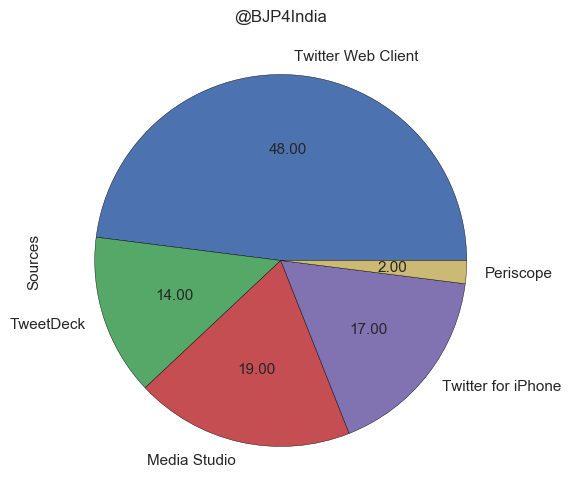

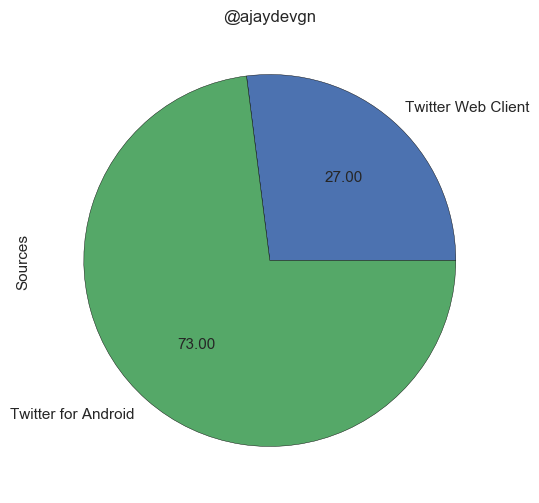

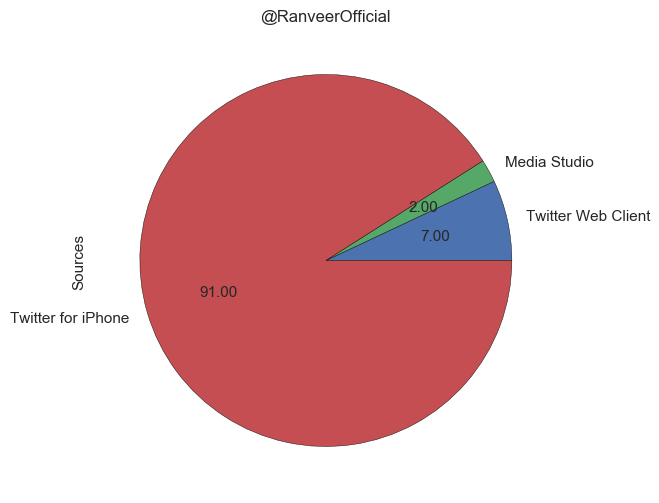

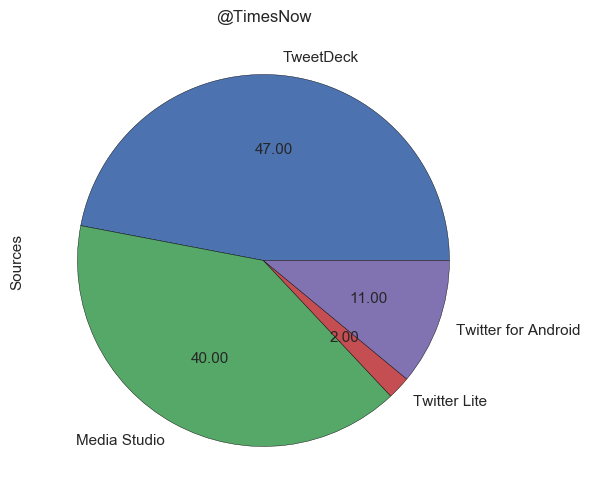

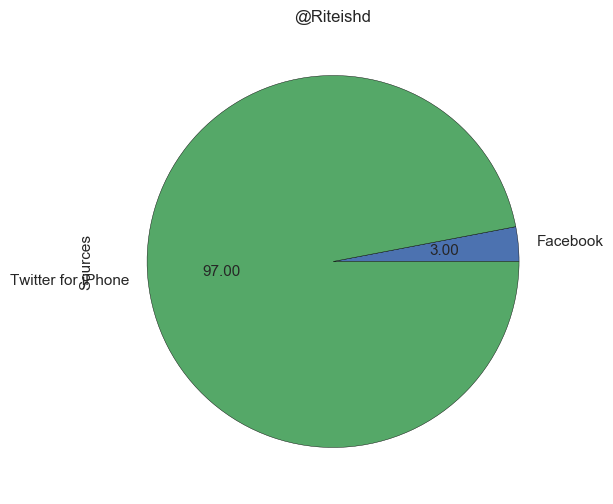

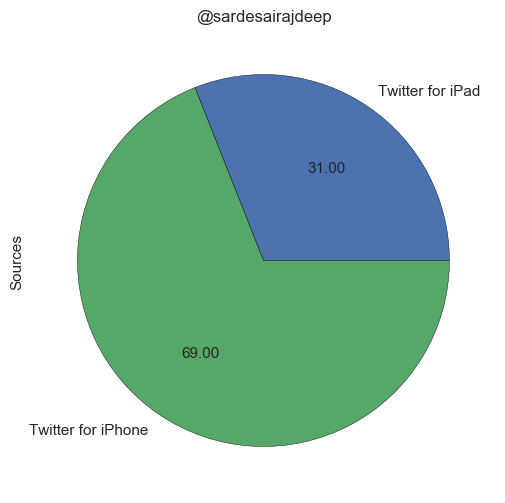

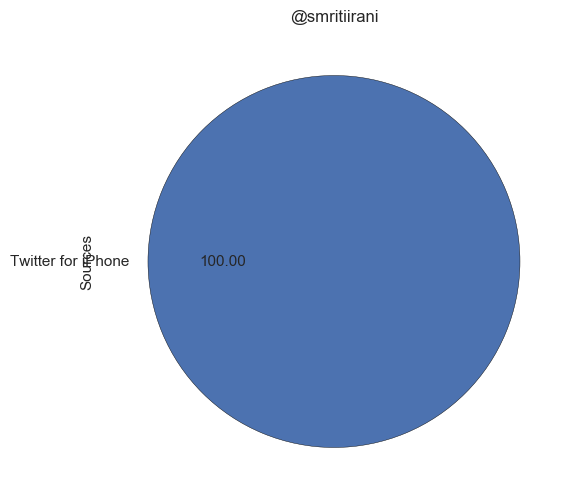

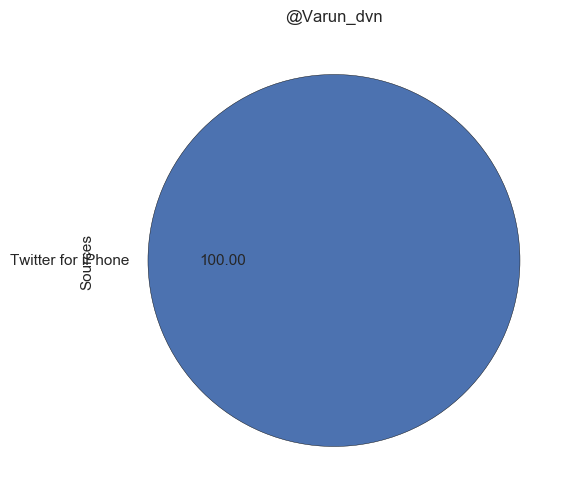

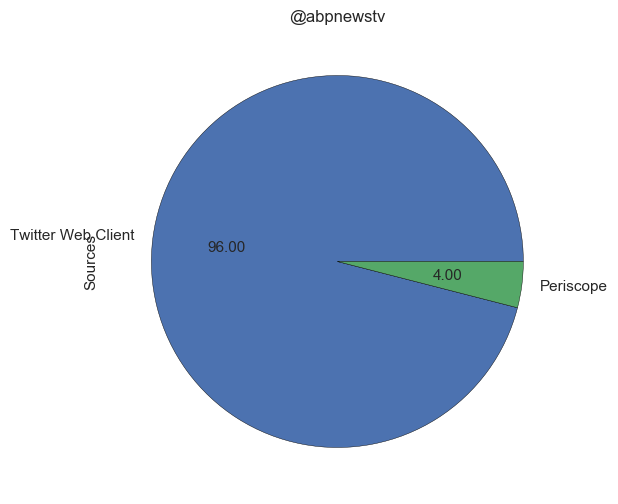

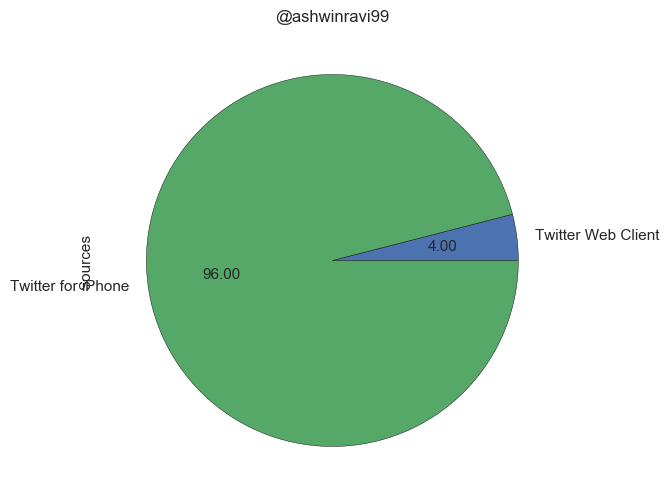

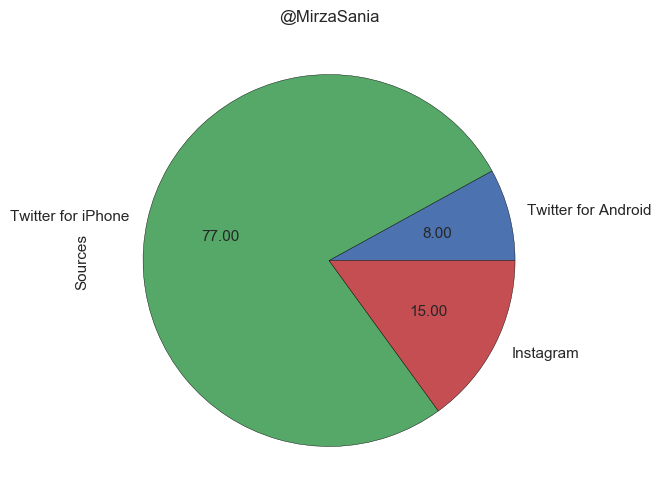

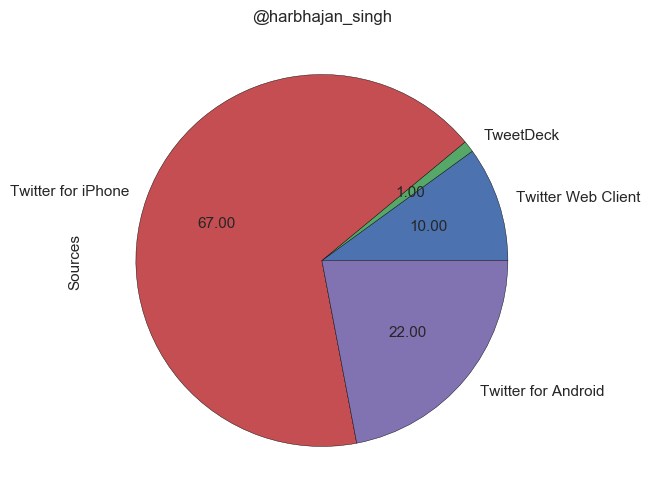

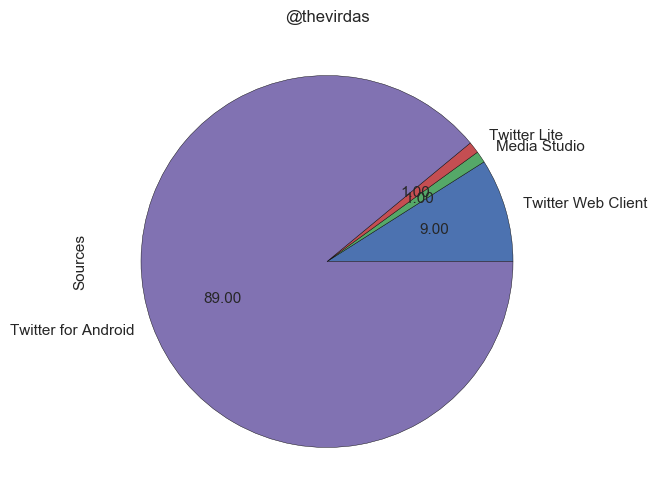

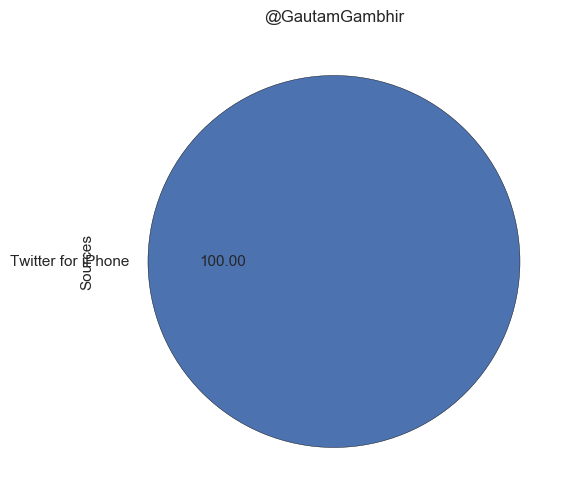

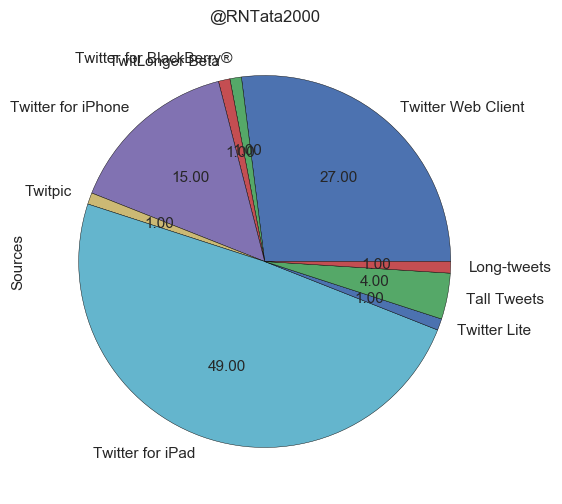

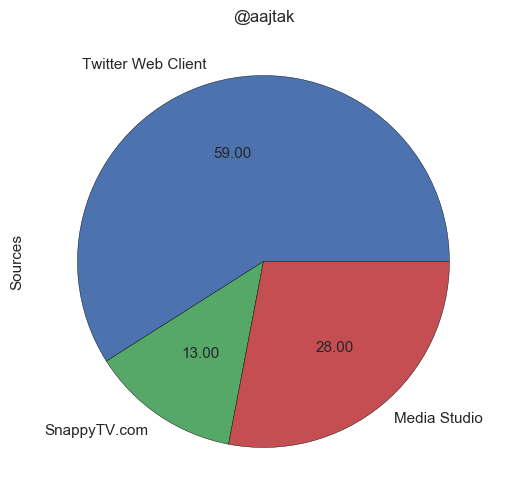

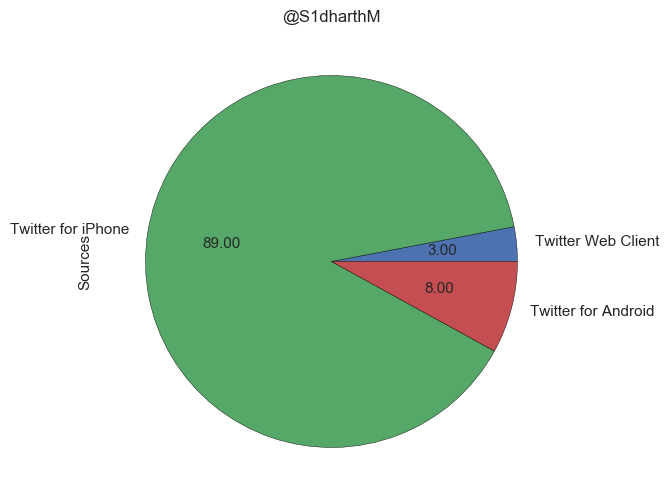

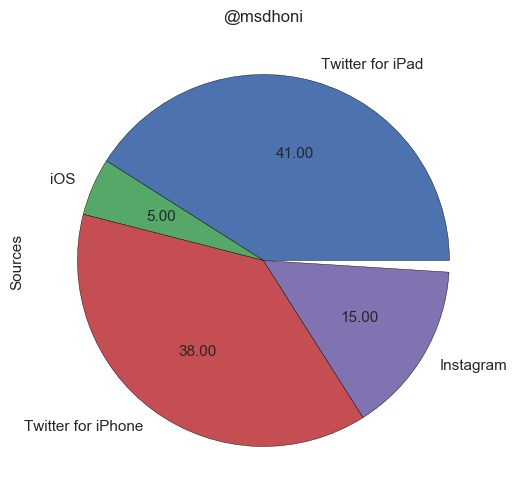

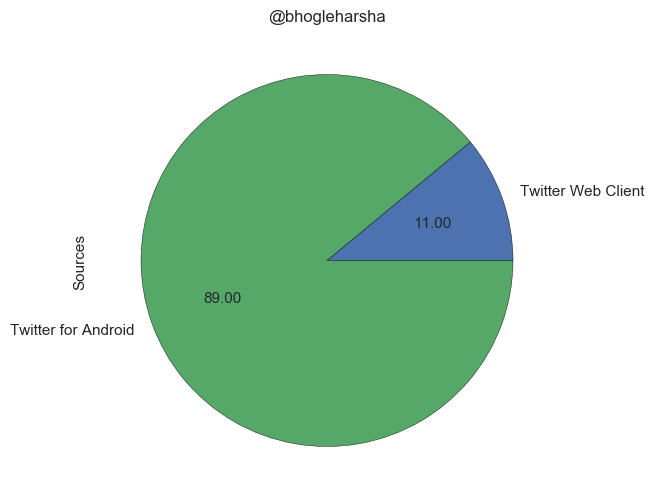

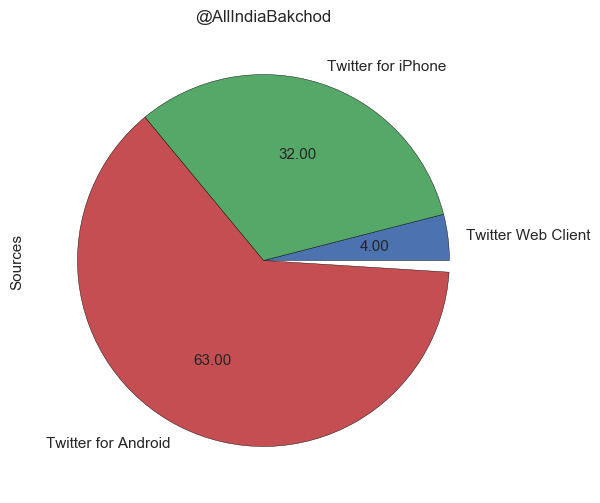

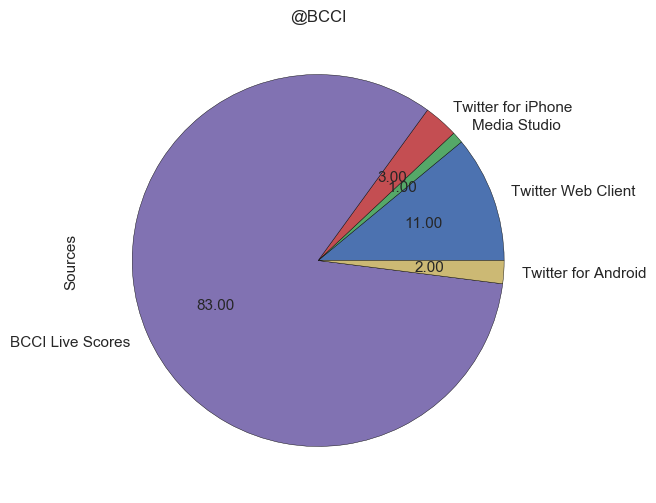

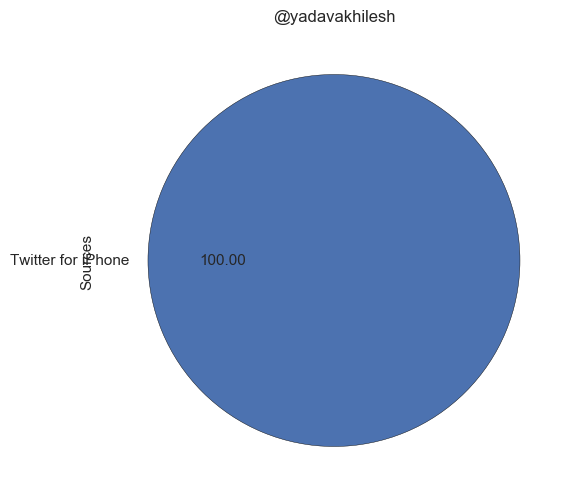

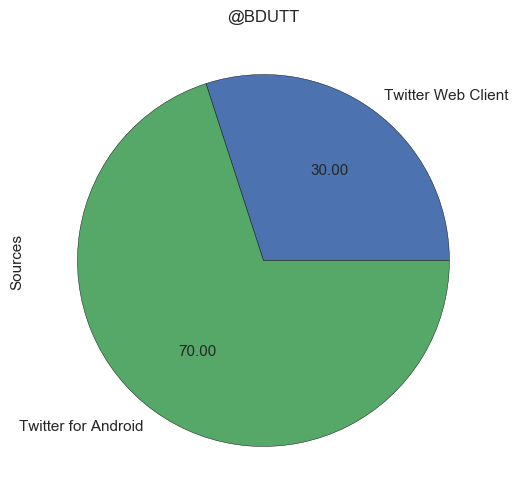

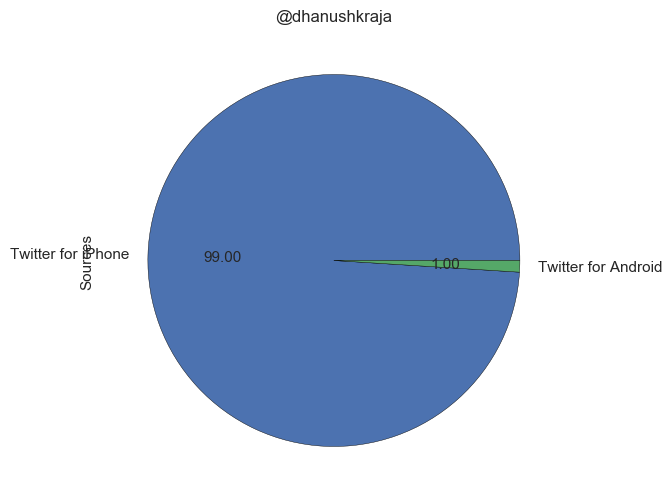

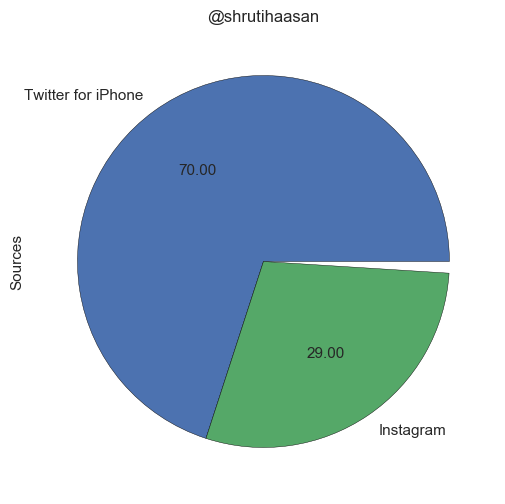

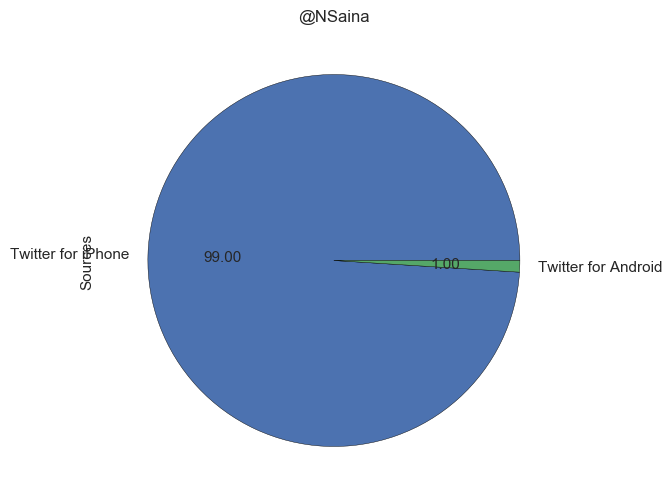

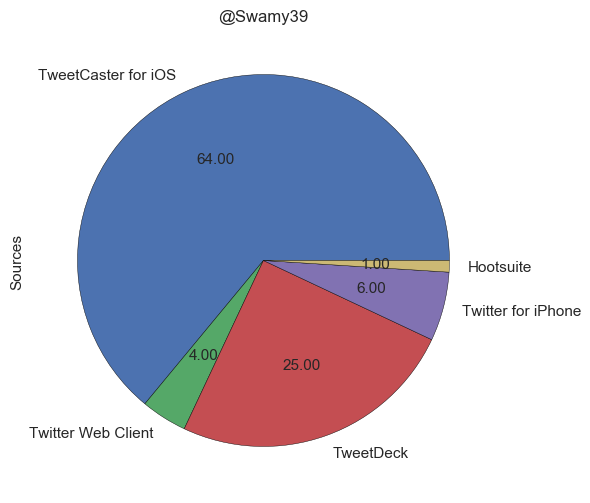

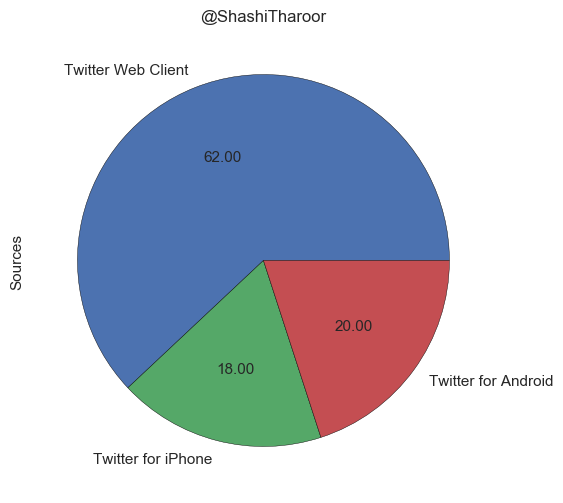

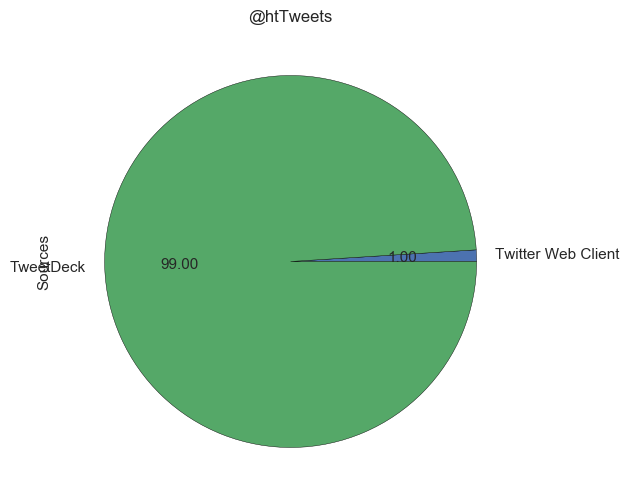

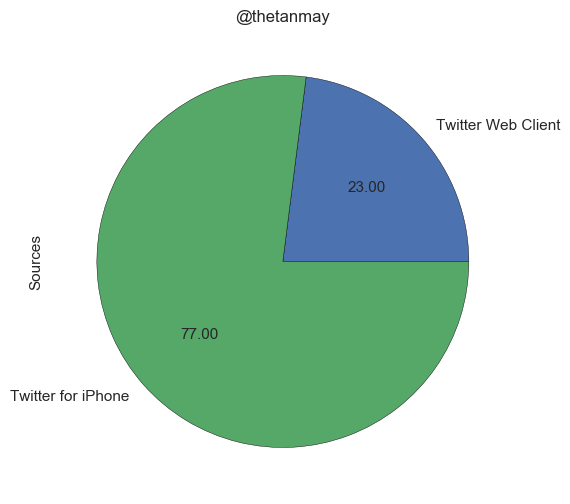

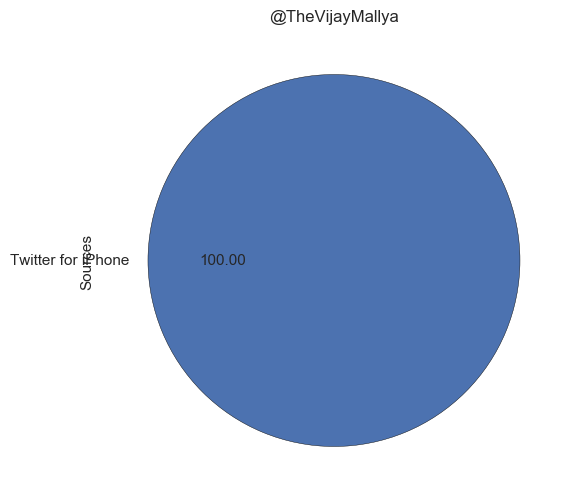

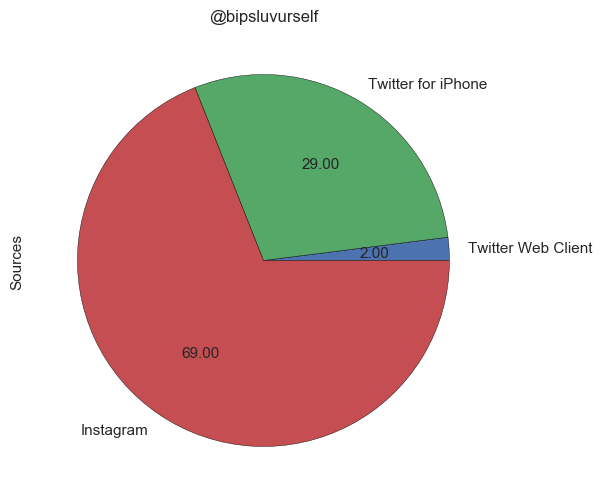

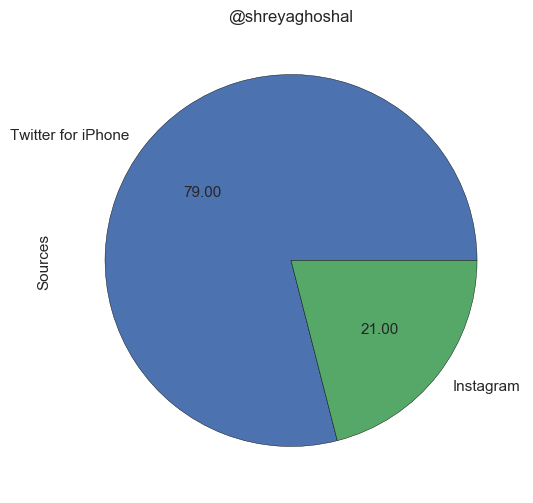

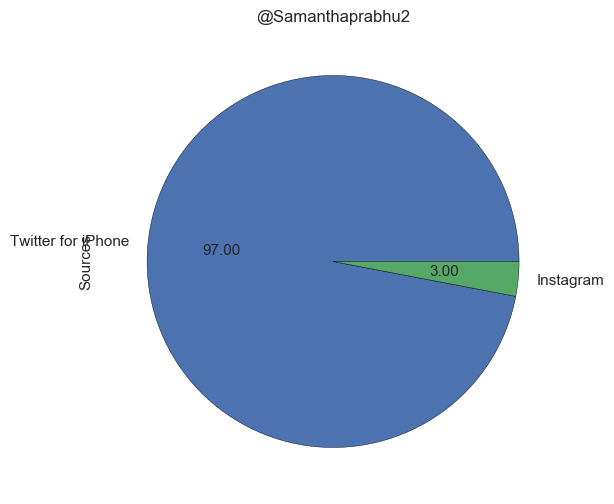

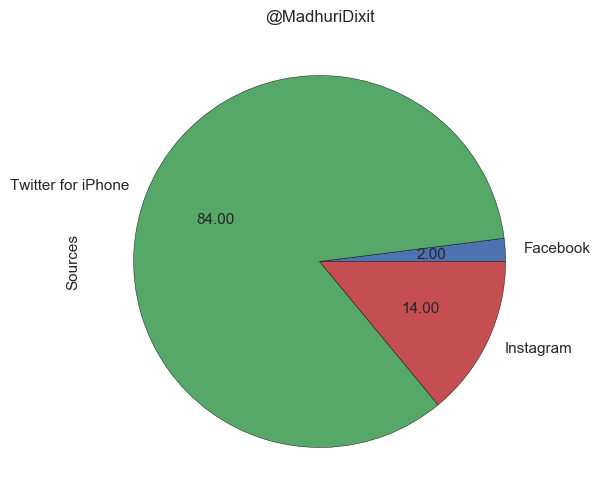

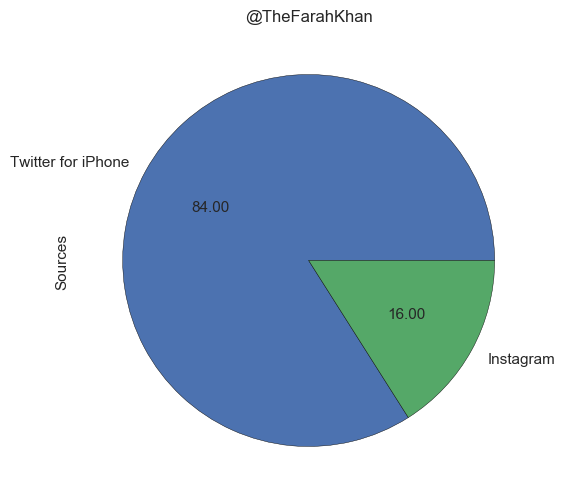

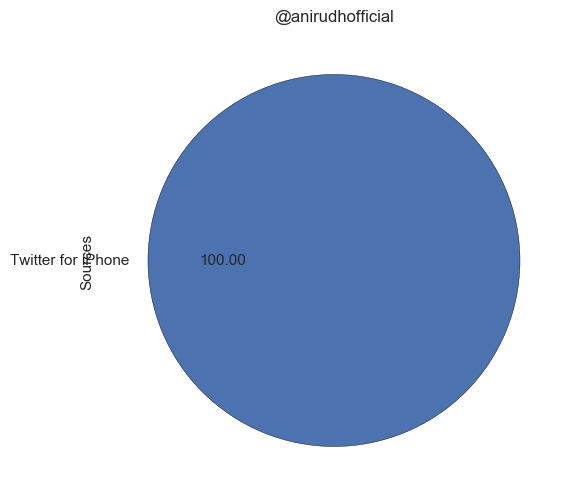

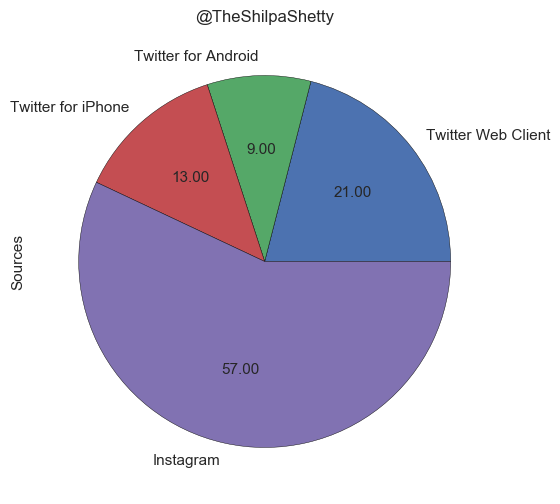

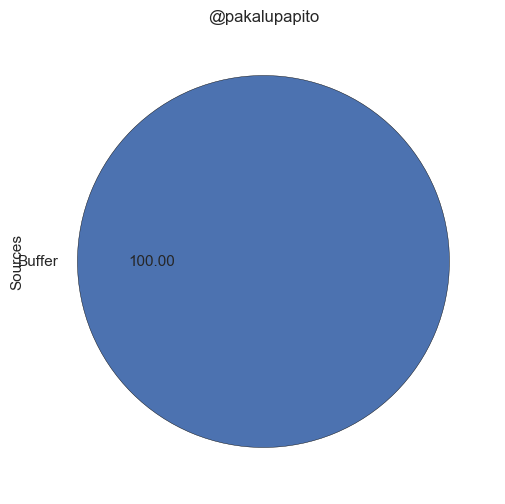

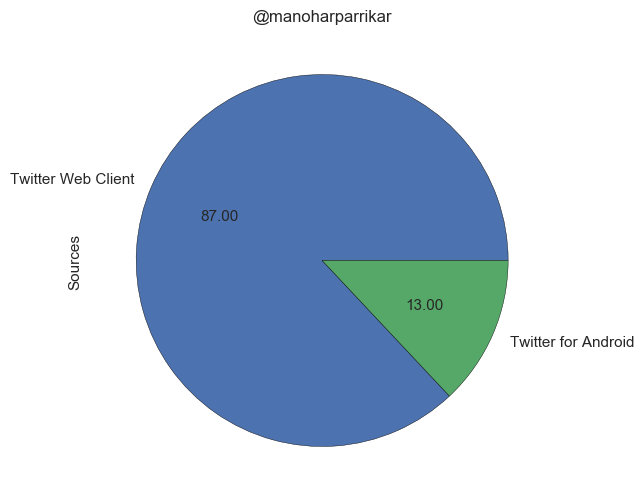

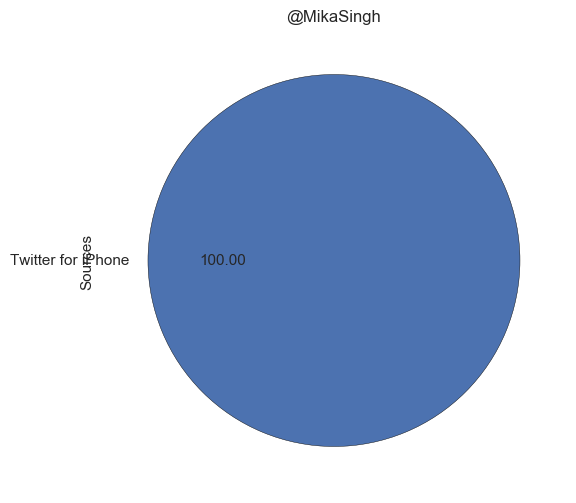

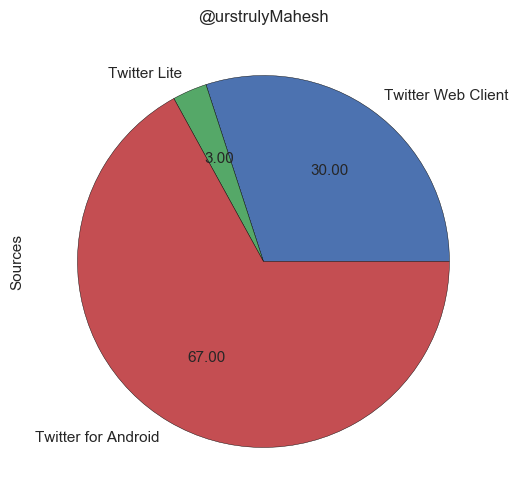

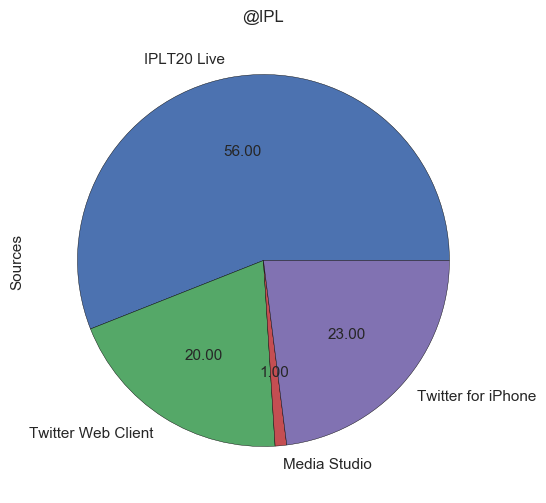

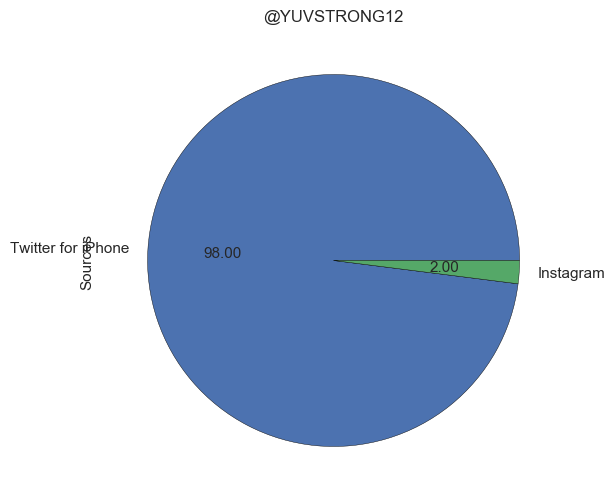

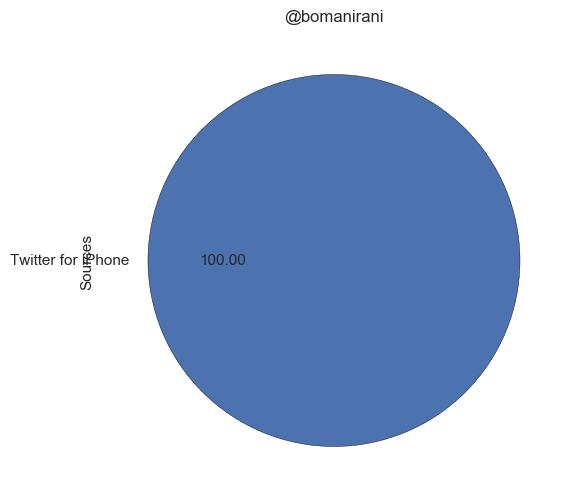

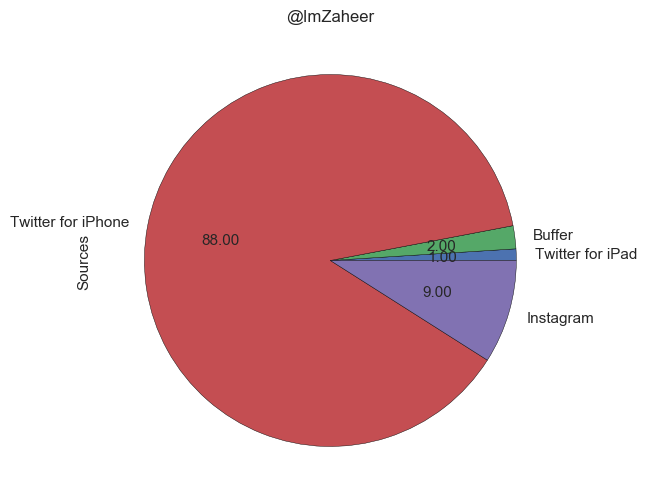

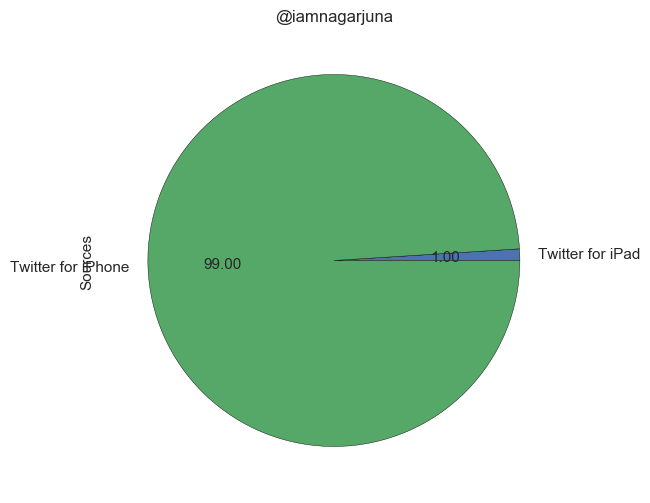

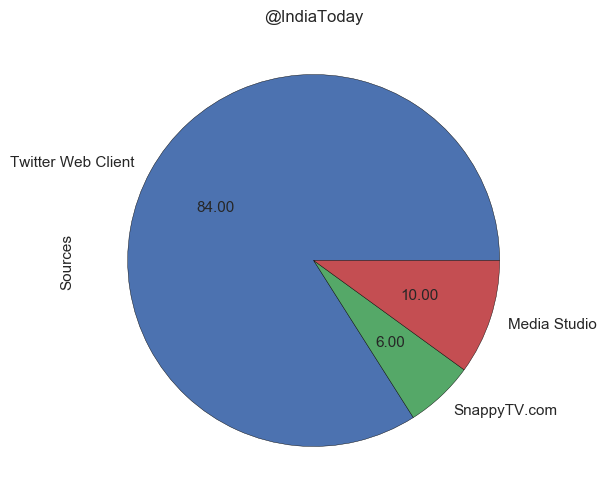

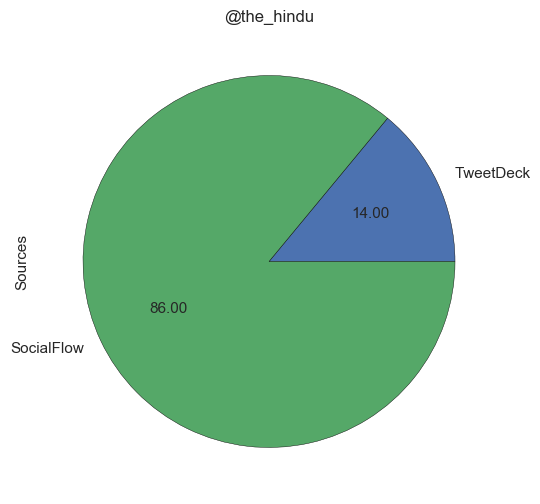

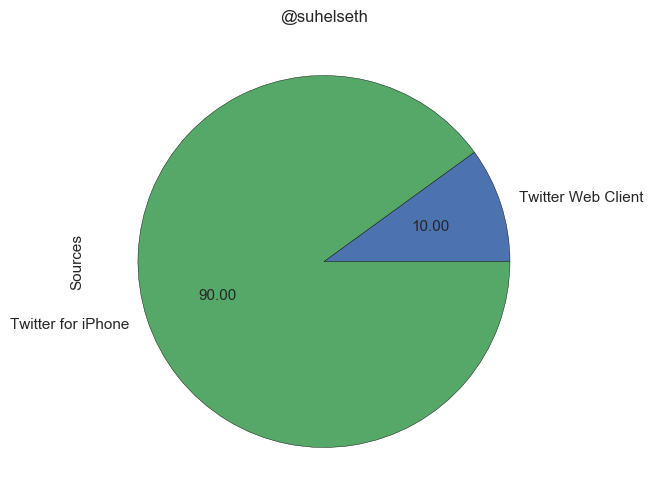

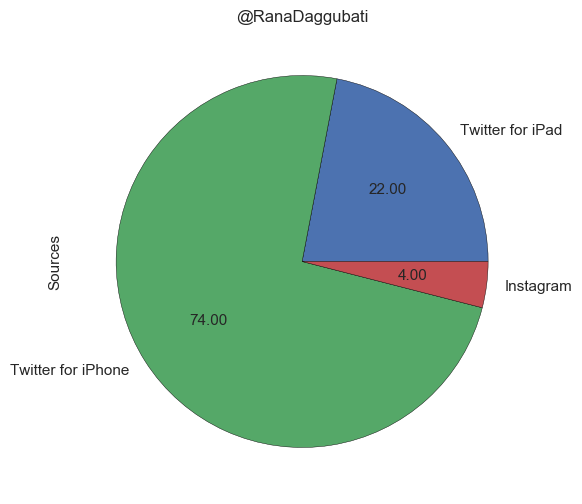

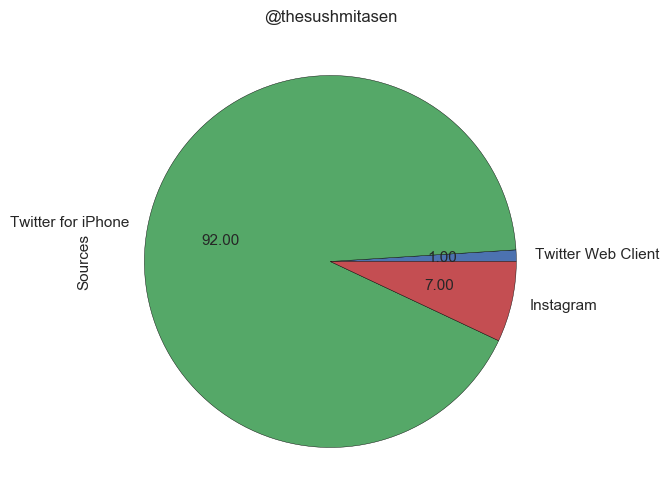

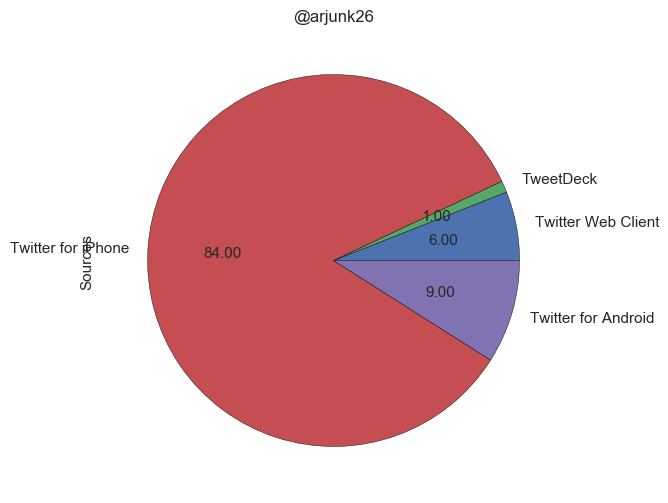

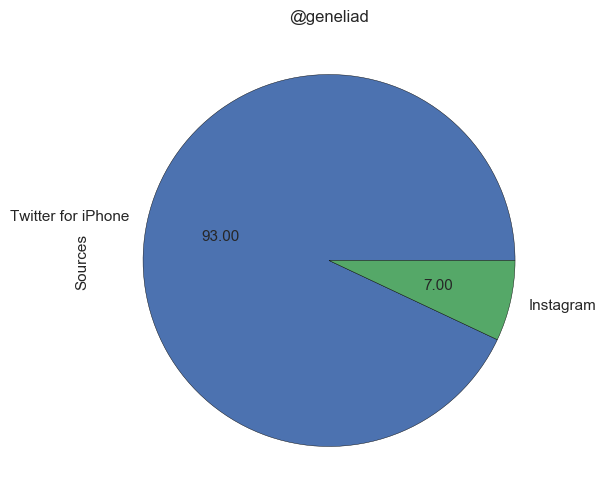

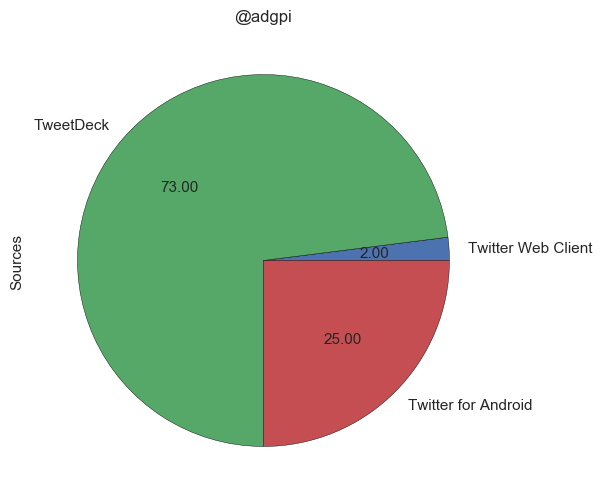

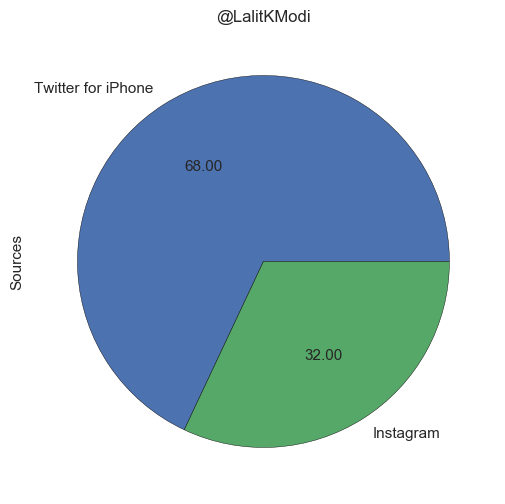

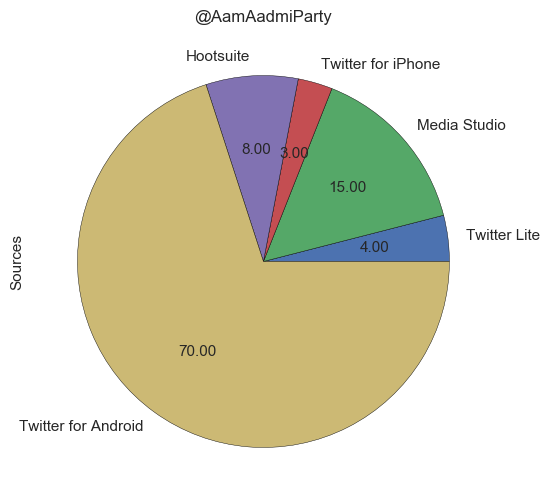

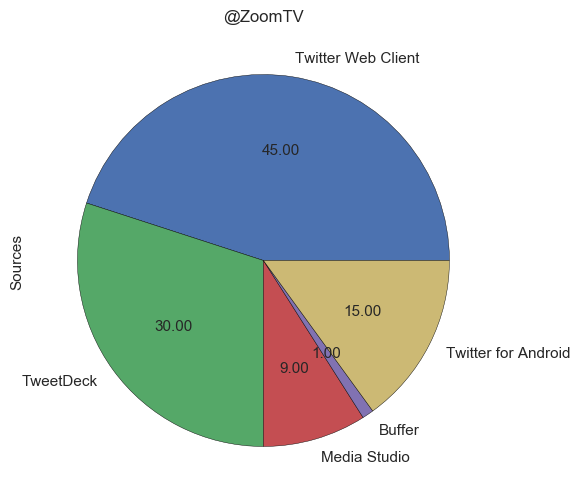

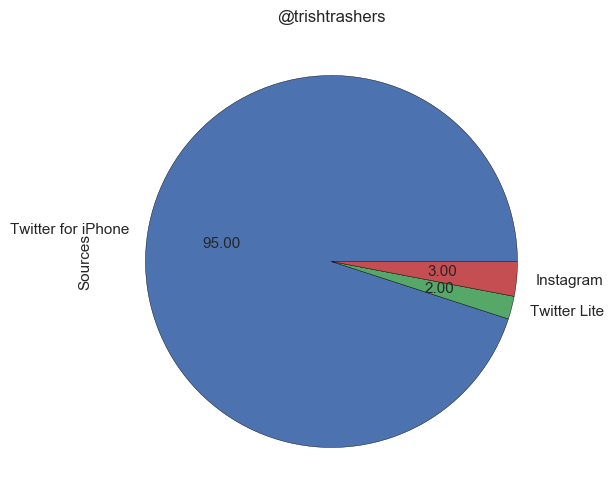

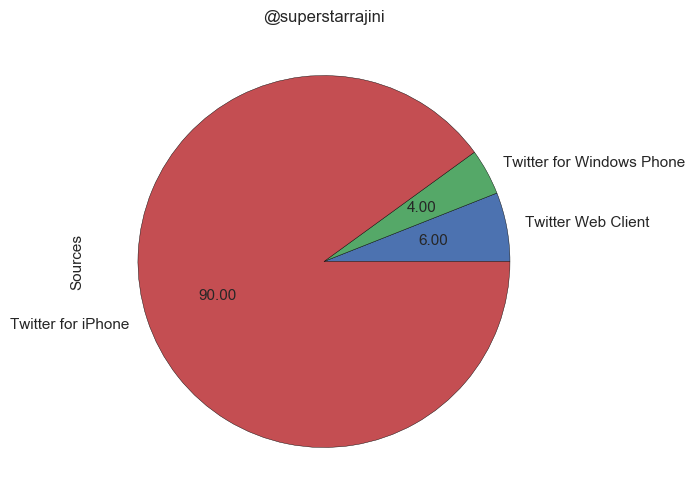

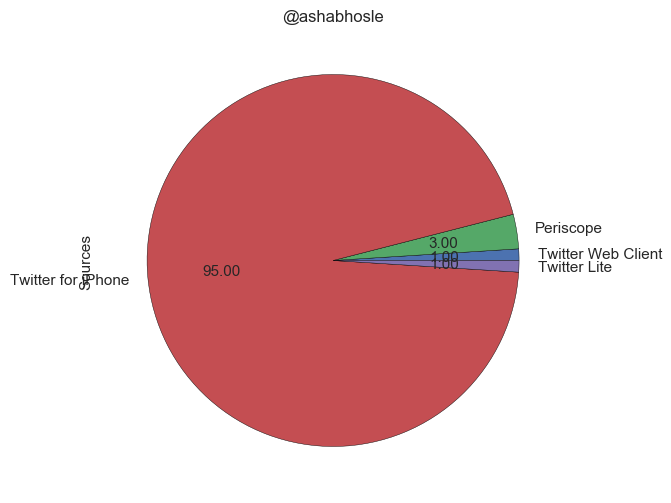

In [399]:
for i in tweeterNames:
    fig, axs = plt.subplots(1,1)
    identifySources(i)